# Performance Evaluation

CSI 4106 - Fall 2025

Marcel Turcotte  
Version: Sep 21, 2025 12:33

# Preamble

## Message of the Day

<https://youtu.be/sDZ1j0J-fe8>

[Demis Hassabis: The CEO Working to Solve Cancer With
AI](https://youtu.be/sDZ1j0J-fe8), Bloomberg Technology, 2025-09-14.

In a recent interview with Bloomberg Technology, Demis Hassabis
discussed the innovative work of Isomorphic Labs in significantly
expediting drug development processes. Below is a summary of Hassabis’
notable achievements:

-   A chess prodigy from a young age, Hassabis began playing at four
    years old and achieved an Elo rating of approximately 2300 by the
    age of 13.
-   He co-founded [DeepMind](https://deepmind.google) in 2010 alongside
    Shane Legg and Mustafa Suleyman, where he currently serves as CEO.
-   Under his leadership, DeepMind has pioneered several groundbreaking
    advancements in artificial intelligence, including the development
    of [AlphaGo](https://deepmind.google/research/projects/alphago/)
    and, notably, [AlphaFold and
    AlphaFold2](https://deepmind.google/science/alphafold/), which are
    pivotal in protein structure prediction.
-   In recognition of his contributions to protein structure prediction,
    Hassabis was awarded the [Nobel Prize in Chemistry in
    2024](https://www.nobelprize.org/prizes/chemistry/2024/hassabis/facts/).
-   In 2021, he founded [Isomorphic
    Labs](https://www.isomorphiclabs.com), which concentrates on the
    application of AI in drug discovery and translational science.
-   [“The Thinking Game”](https://thinkinggamefilm.com) is a documentary
    that explores the life of Demis Hassabis, the evolution of DeepMind,
    and the pursuit of artificial general intelligence (AGI).

In a related vein, an article titled “[Which diseases will you have in
20 years? This AI accurately predicts your
risks](https://www.nature.com/articles/d41586-025-02993-x)” was
published in Nature on September 17, 2025. This brief news piece
discusses Delphi-2M, a large language model designed to analyze an
individual’s medical records and lifestyle factors to provide risk
assessments for over 1,000 diseases. Complementing the article, a
[podcast](https://www.nature.com/articles/d41586-025-03026-3) is also
available for further insights.

## Summary

This lecture covers classification model evaluation, focusing on
confusion matrices and key metrics: accuracy, precision, recall, and F₁
score. It addresses accuracy’s limitations in imbalanced datasets,
introducing micro and macro averaging. The precision-recall trade-off
and ROC analysis, including AUC, are also explored. Practical insights
are provided through Python implementations like logistic regression via
gradient descent.

## Learning Outcomes

-   **Describe** the structure and role of the confusion matrix in model
    evaluation.
-   **Compute** and **interpret** accuracy, precision, recall, and $F_1$
    score.
-   **Identify** the pitfalls of using accuracy with imbalanced
    datasets.
-   **Differentiate** between micro and macro averaging for performance
    metrics.
-   **Analyze** precision-recall trade-offs and **construct** ROC
    curves, including the calculation of AUC.
-   **Implement** the calculation or ROC curves and AUC in Python.

# Performance Metrics

## Confusion Matrix

|  | **Positive** (**Predicted**) | **Negative** (**Predicted**) |
|------------------------|------------------------|------------------------|
| **Positive** (**Actual**) | True positive (TP) | False negative (FN) |
| **Negative** (**Actual**) | False positive (FP) | True negative (TN) |

A **confusion matrix** is a table summarizing the performance of a
classification algorithm (here for a binary classification task).

-   In statistical analysis, **False Positives (FP)** are commonly
    referred to as **Type I errors**, and **False Negatives (FN)** are
    known as **Type II errors**.
-   The diagonal elements represent the correctly predicted outcomes,
    namely true positives (TP) and true negatives (TN).
-   In contrast, the off-diagonal elements correspond to incorrect
    predictions, specifically false positives (FP) and false negatives
    (FN).
-   The **confusion matrix** encapsulates all essential information
    required to assess the performance of a classification model.
-   While the confusion matrix provides a comprehensive view, more
    **concise metrics** such as **accuracy**, **precision**, **recall**,
    and the **F$_1$ score** are often more intuitive and practical for
    summarizing model performance.

## ConfusionMatrixDisplay

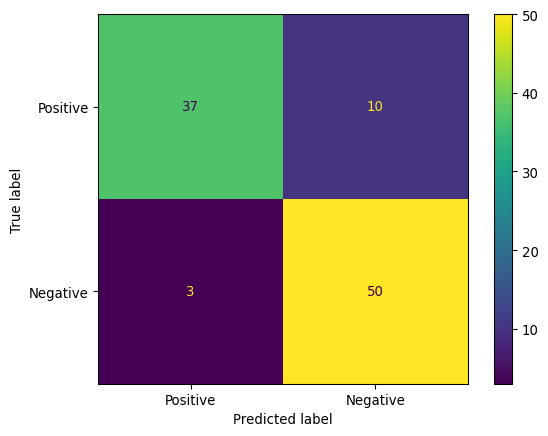

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

seed = 42

X, y = make_classification(n_samples = 500, random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

clf = LogisticRegression(random_state=seed)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=[1, 0])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])

disp.plot()
plt.show()

We employ the `make_classification` function to generate a synthetic
dataset, which are subsequently analyzed using a `LogisticRegression`
model. For both `confusion_matrix` and `ConfusionMatrixDisplay`, we
configure the labels to ensure that the ‘Positive’ class precedes,
aligning with the tabular data presented in the previous screen. The
resulting confusion matrix yields the following values: True Positives
(TP) = 37, False Negatives (FN) = 10, False Positives (FP) = 3, and True
Negatives (TN) = 50.

## Confusion Matrix

Given a test set with $N$ examples and a classifier $h(x):$

$$
C_{i,j} = \sum_{k = 1}^N [y_k = i \wedge h(x_k) = j]
$$

Where $C$ is $l \times l$ matrix, for a dataset with $l$ classes.

A confusion matrix $C$ is defined such that each element $C_{i,j}$
represents the count of observations actually belonging to class $i$ but
predicted to belong to class $j$.

Let us now examine the general case of a confusion matrix with $l$
classes, which may initially appear “confusing” to comprehend.

## Confusion Matrix

-   The total number of examples of the (actual) class $i$ is $$
    C_{i \cdot} = \sum_{j=1}^l C_{i,j}
    $$

-   The total number of examples assigned to the (predicted) class $j$
    by classiﬁer $h$ is $$
    C_{\cdot j} = \sum_{i=1}^l C_{i,j}
    $$

## Confusion Matrix

-   Terms on the diagonal denote the total number of examples classified
    correctly by classifier $h$. Hence, the number of correctly
    classified examples is $$
    \sum_{i=1}^l C_{i,i}
    $$

-   Non-diagonal terms represent misclassifications.

## Confusion Matrix - Multi-Class

To evaluate performance in a **multi-class** setting, one typically
derives **“one-vs-all”** metrics for **each class** from the confusion
matrix. These metrics are then **averaged** using specific weighting
schemes.

## Confusion Matrix - Multi-Class

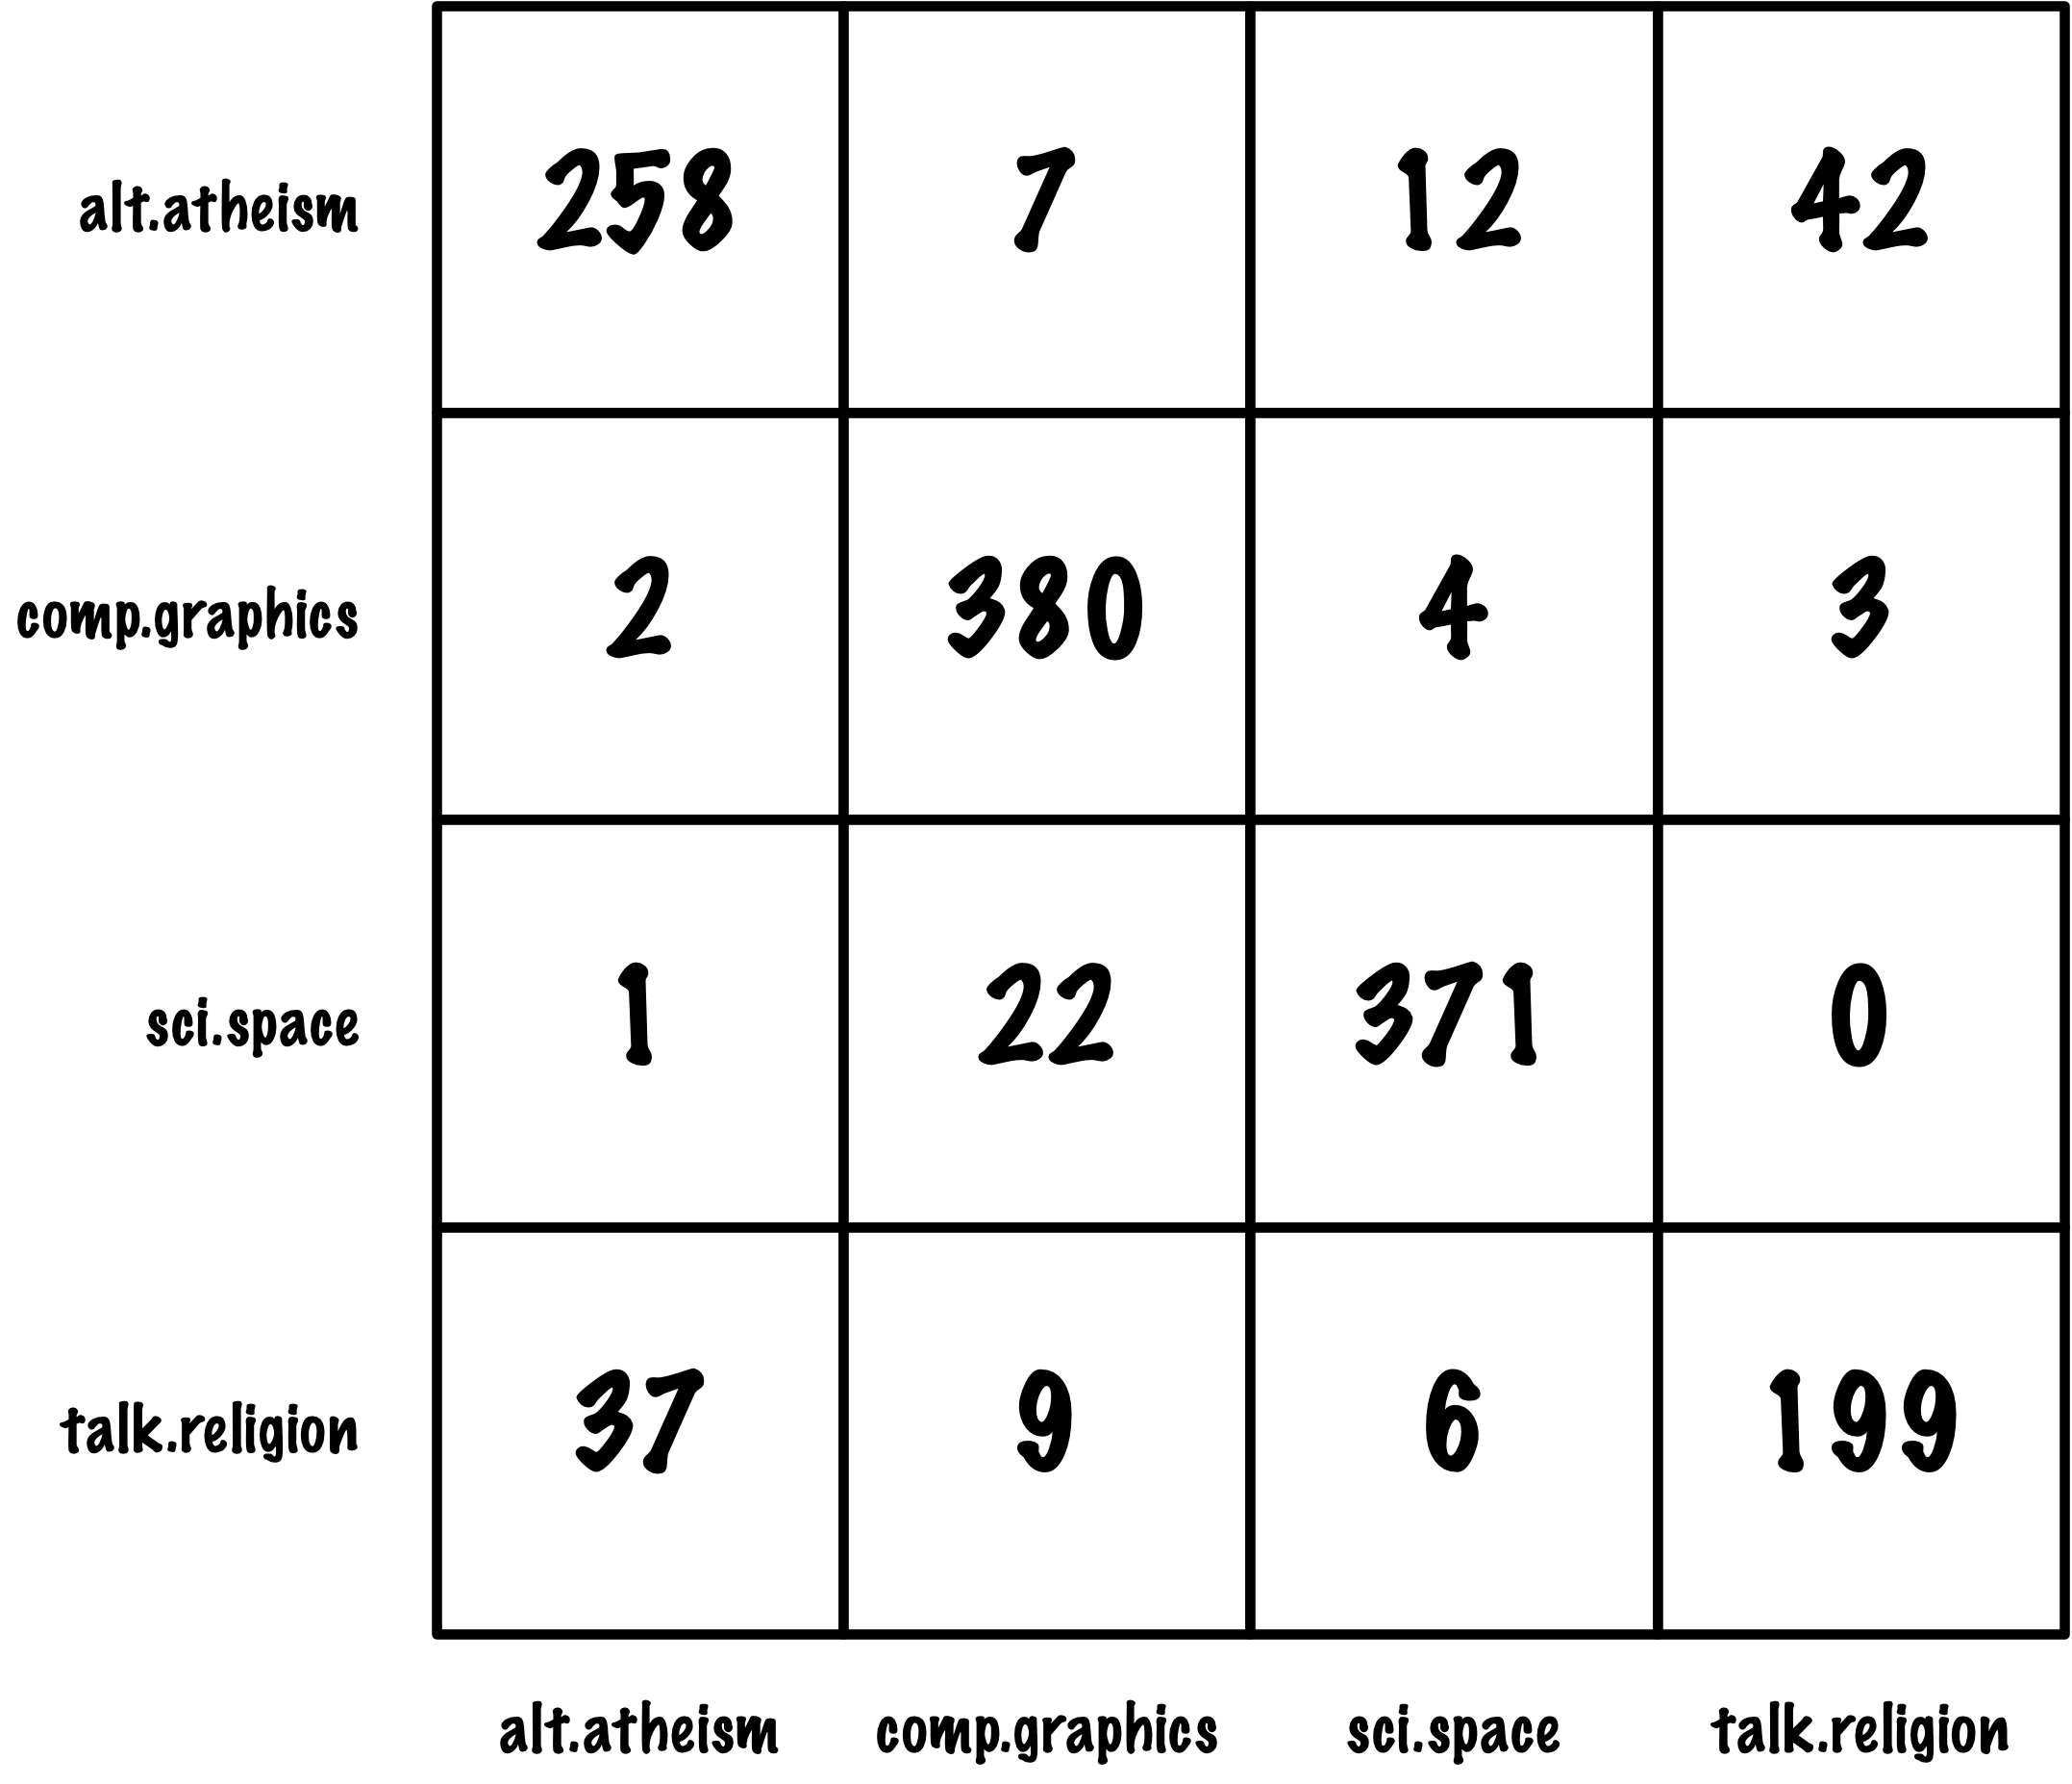

Using data from the [20 newsgroups text
dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups)
from [scikit-learn.org](https://scikit-learn.org).

## Confusion Matrix - True Positive

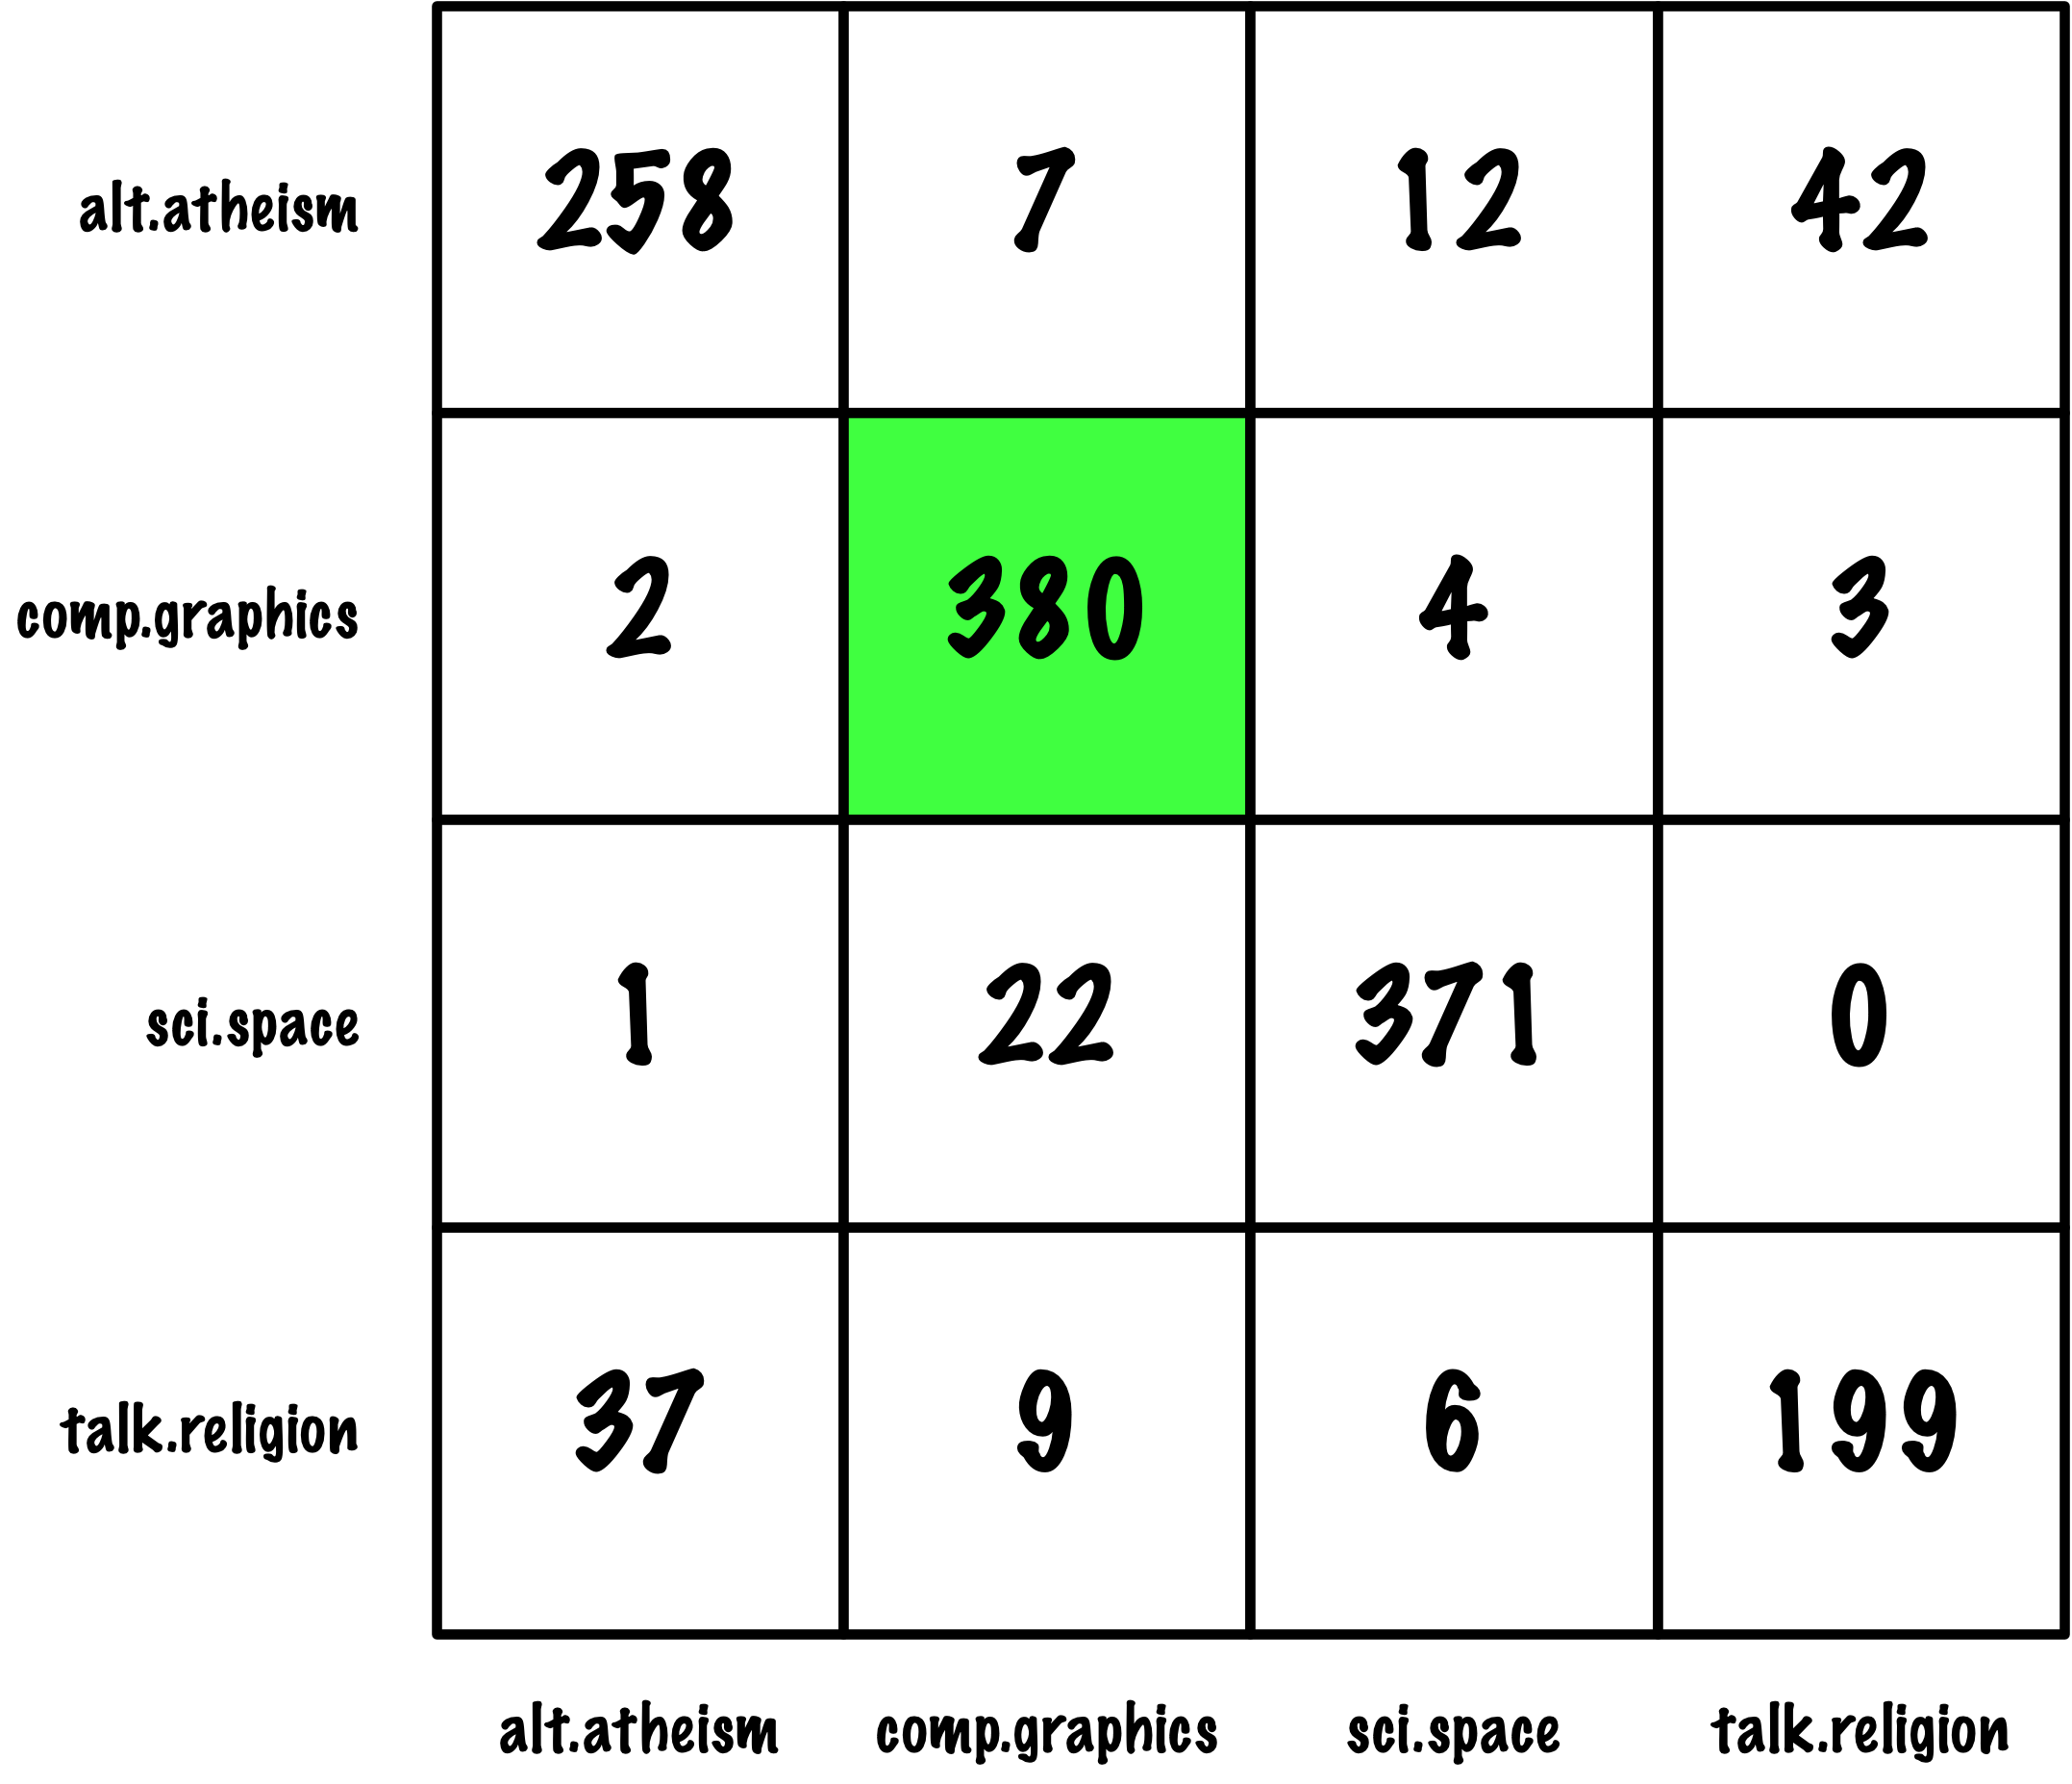

`comp.graphics` is the **true** class ($i$).

## Confusion Matrix - False Positive

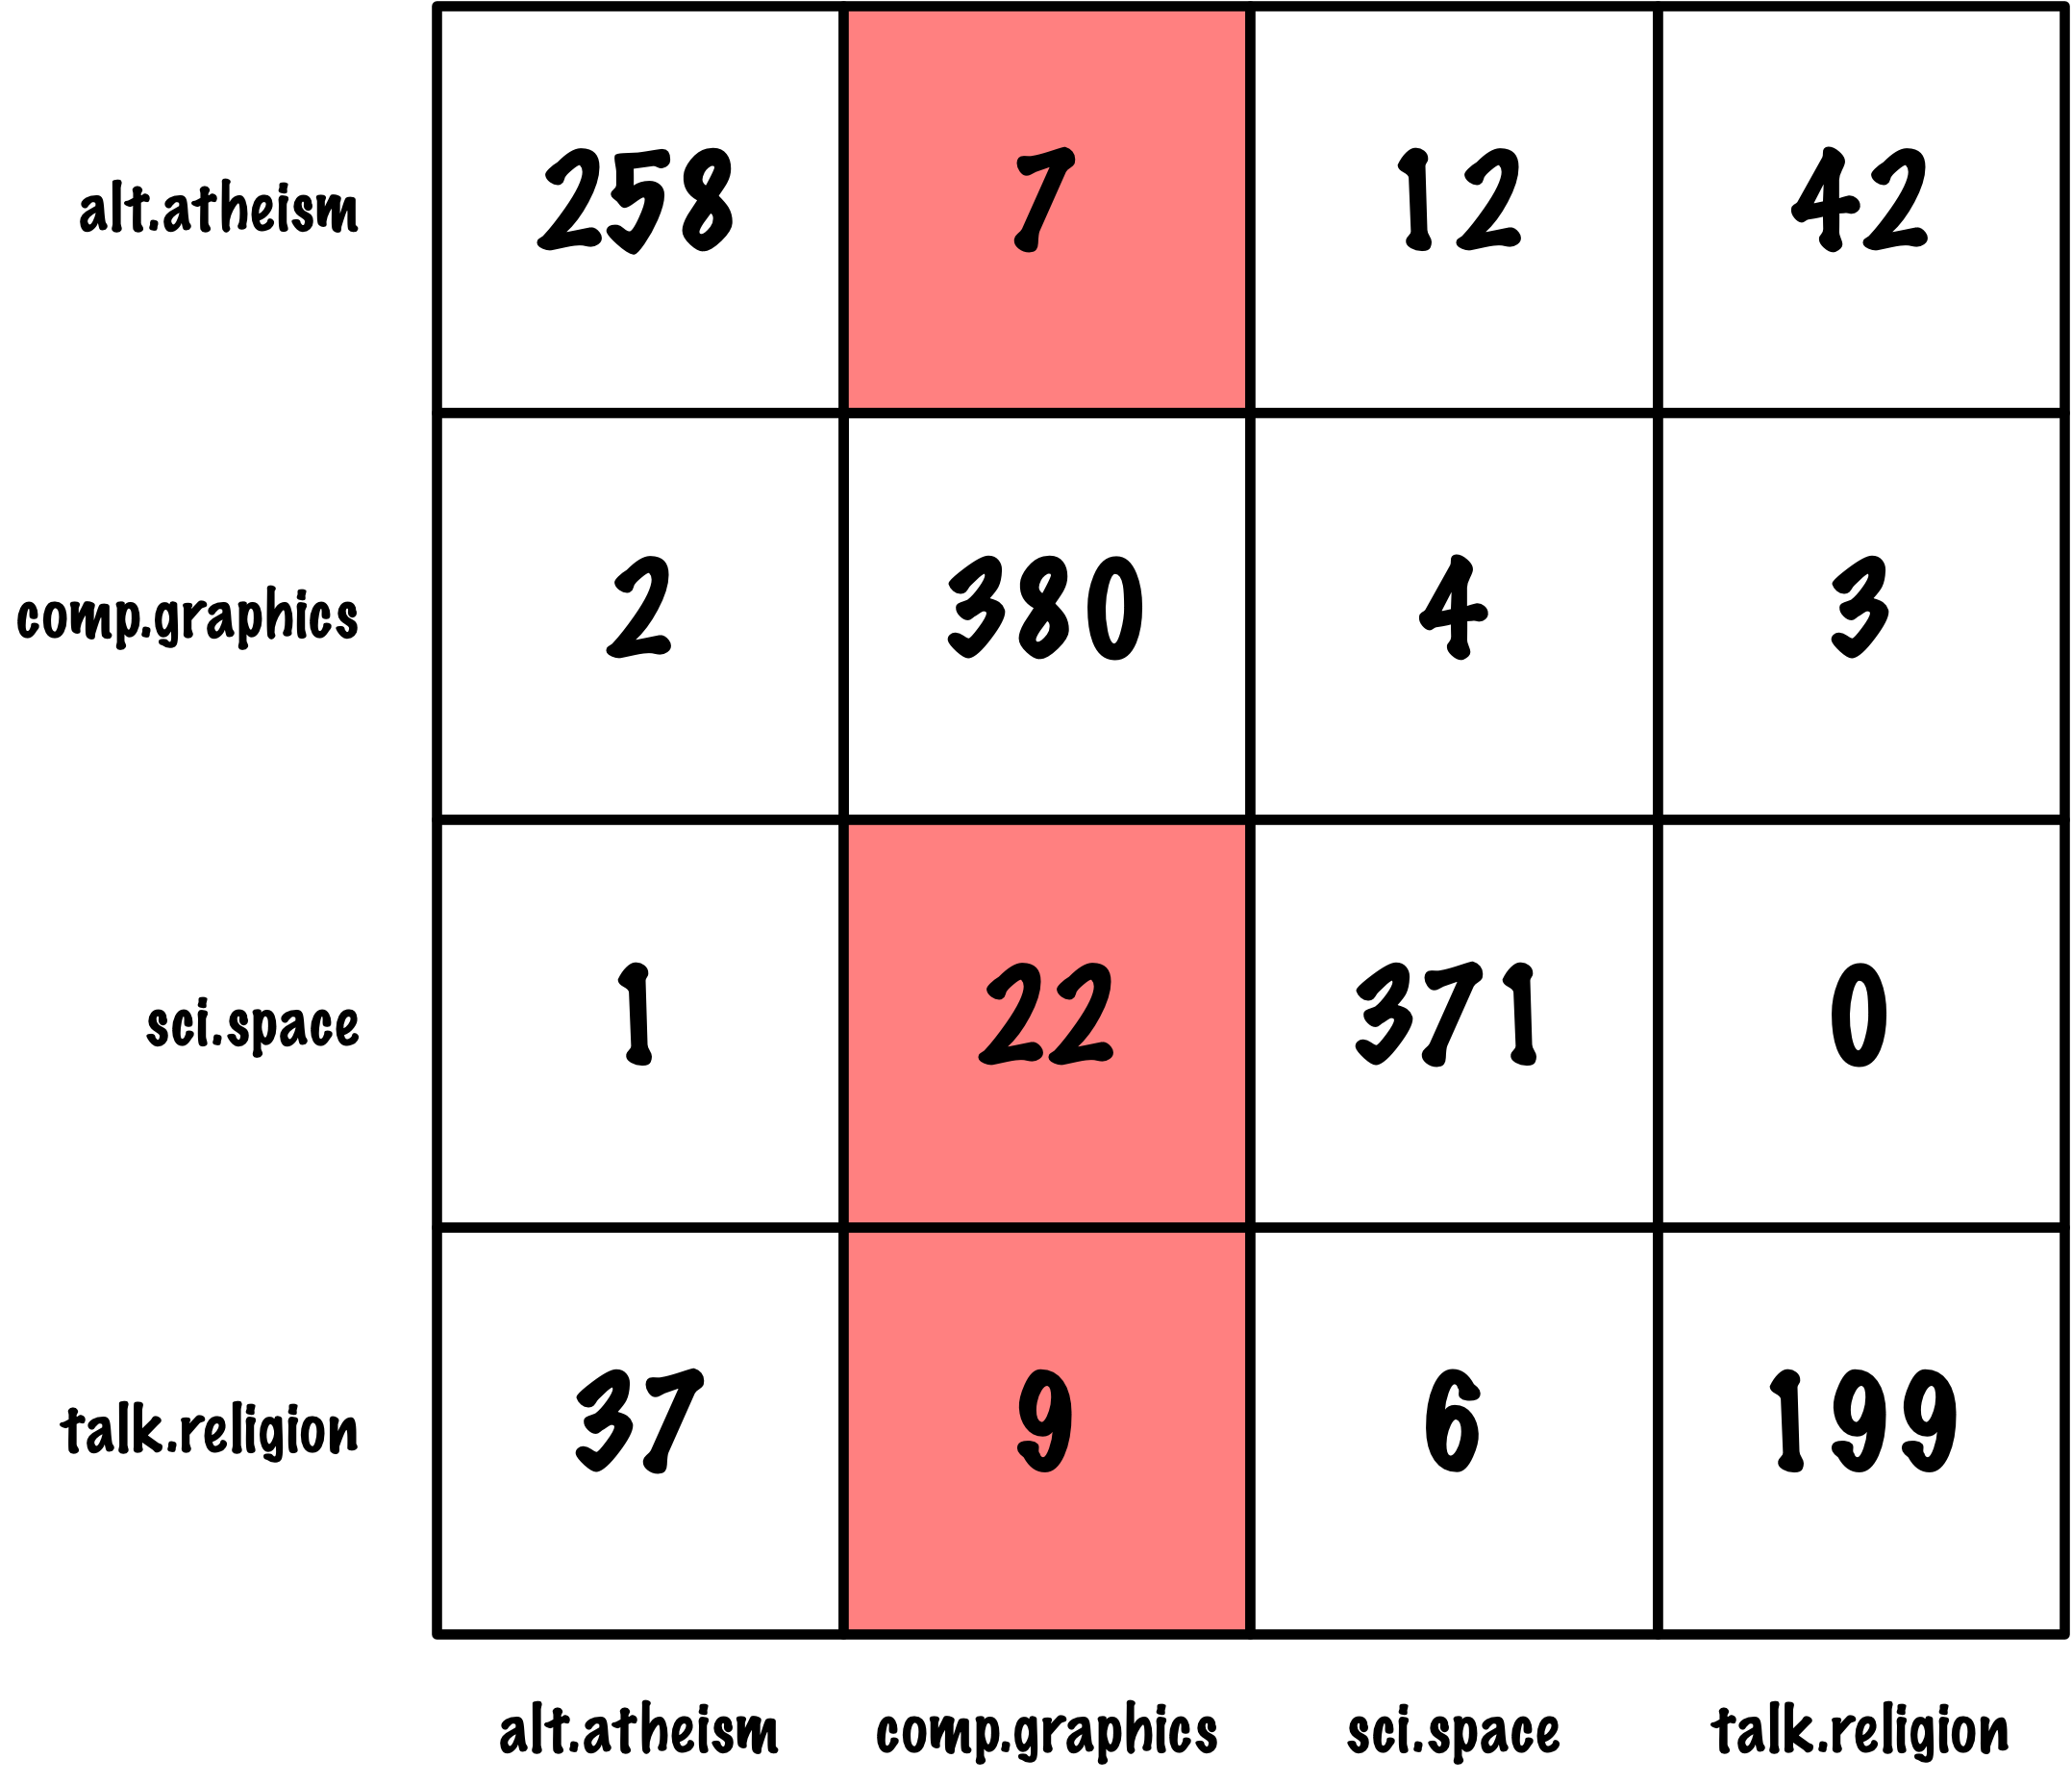

`comp.graphics` is the **true** class ($i$).

## Confusion Matrix - False Negative

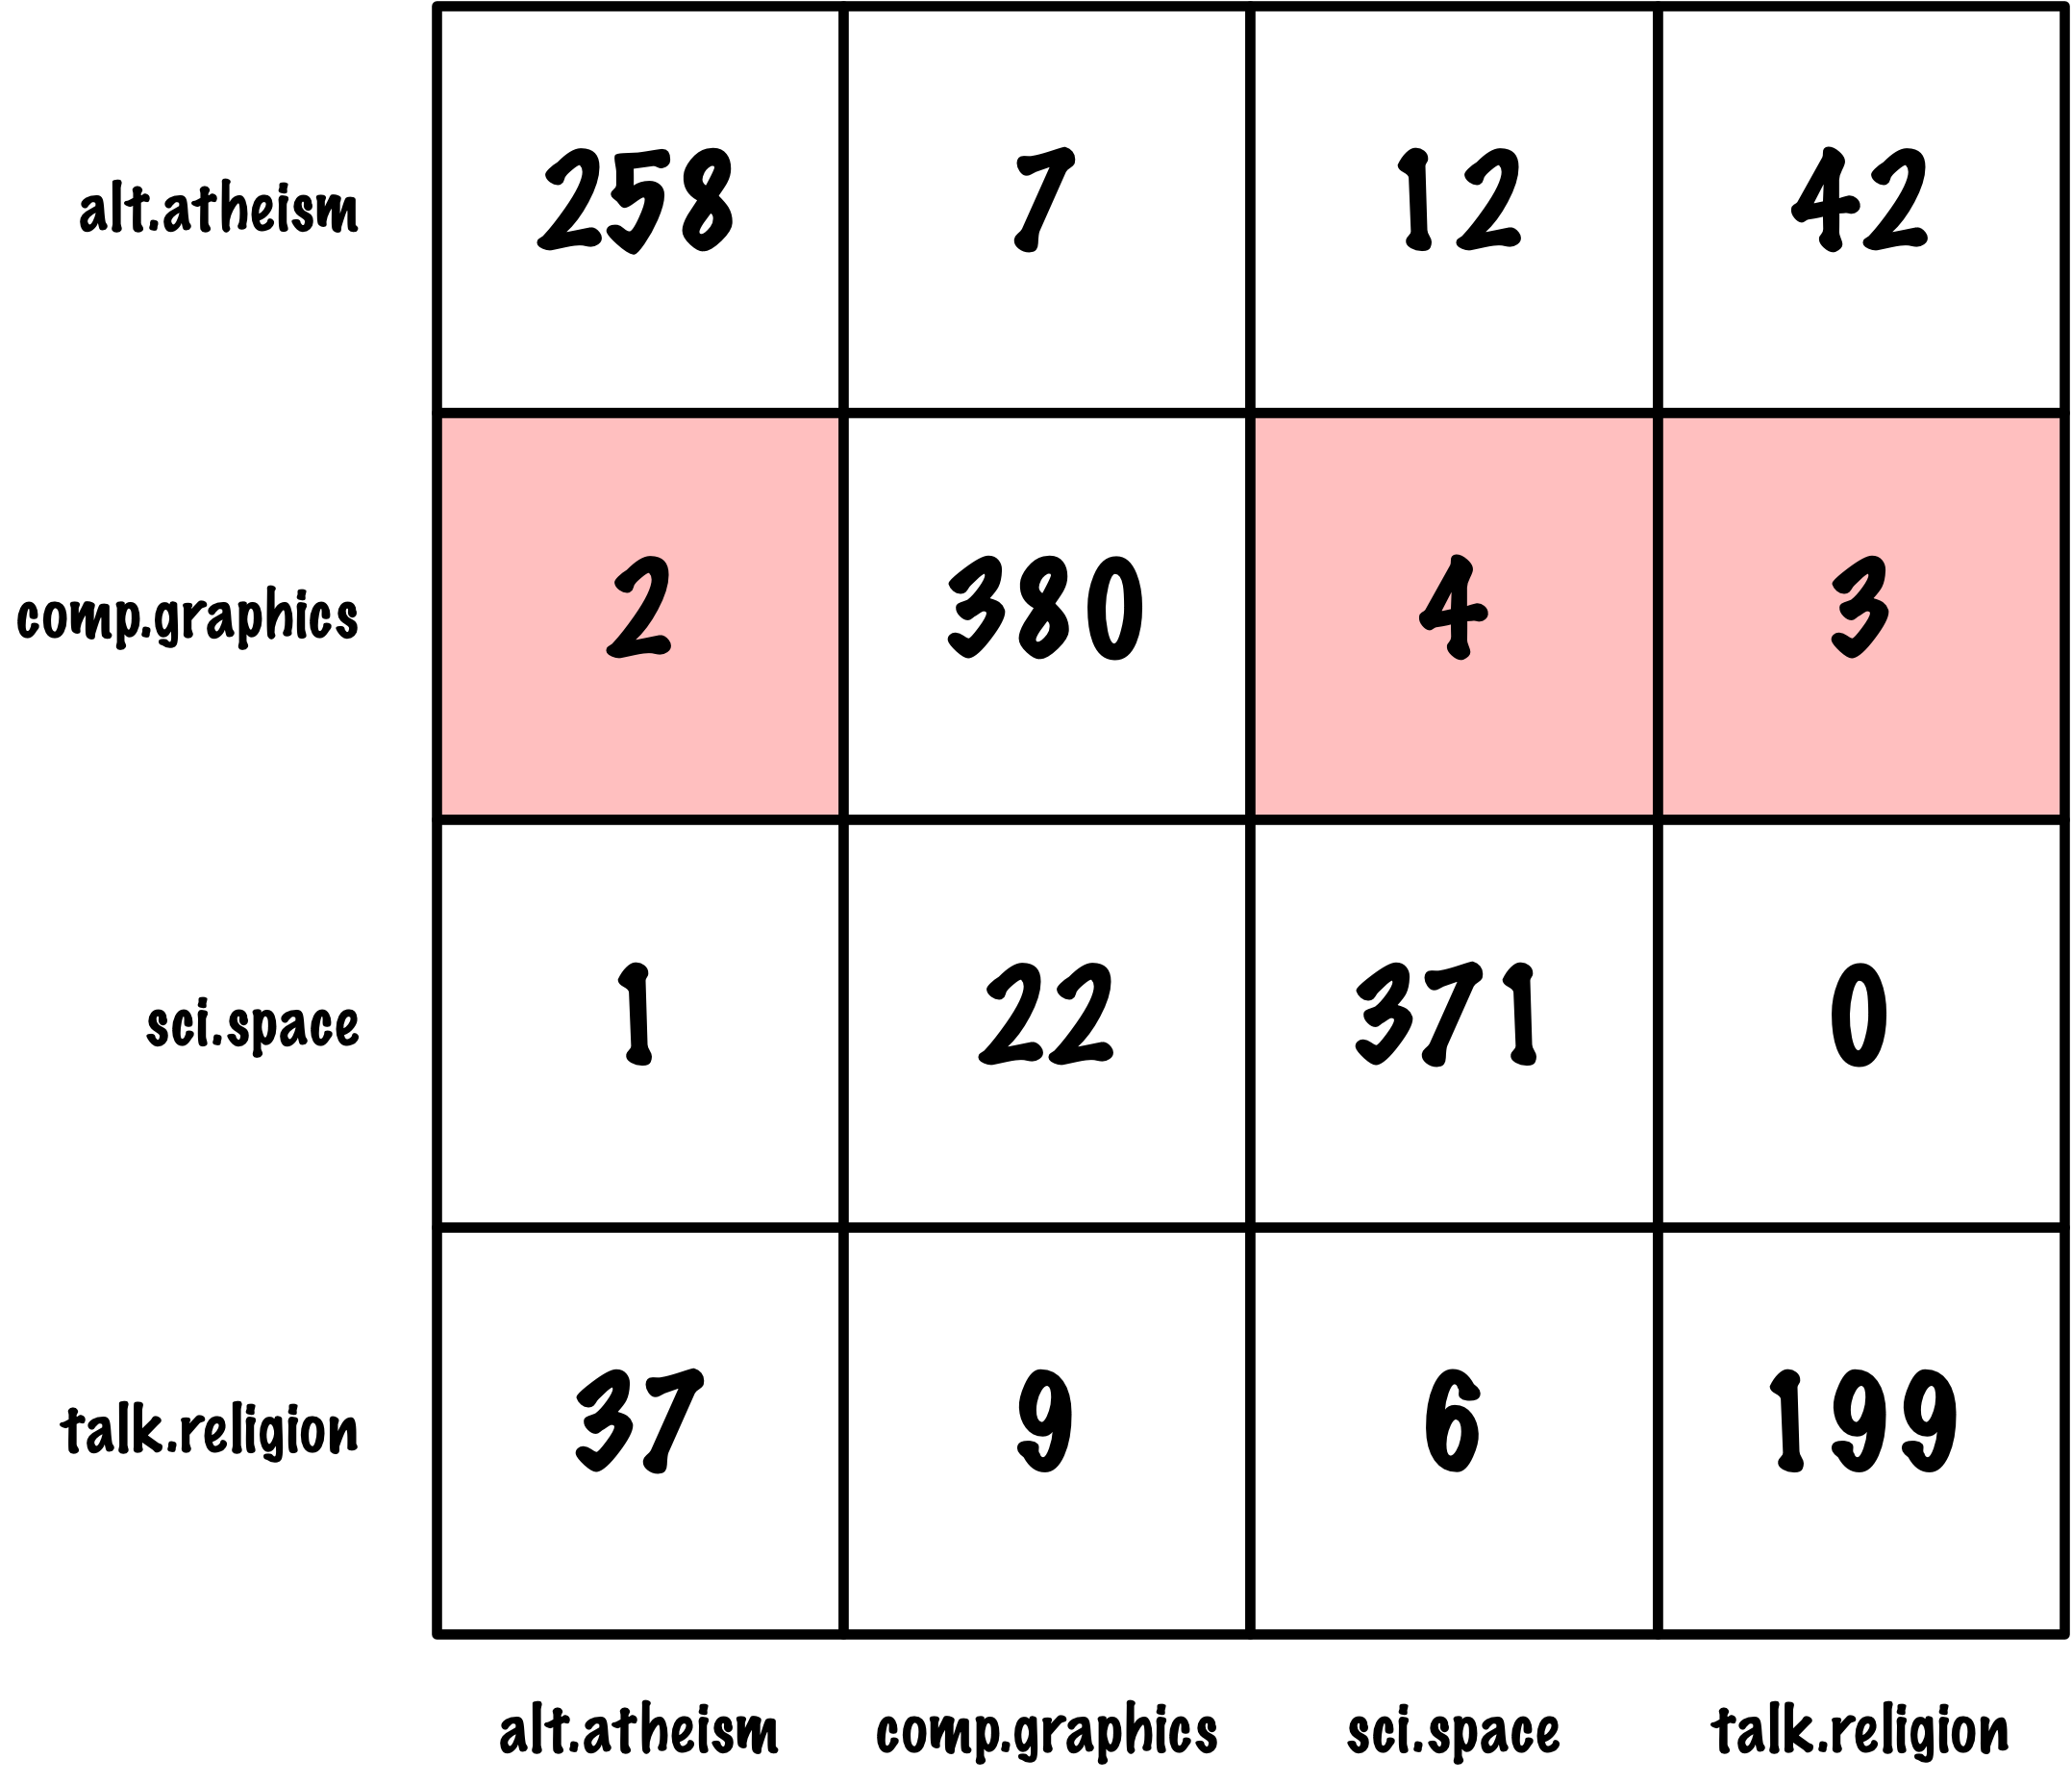

`comp.graphics` is the **true** class ($i$).

## Confusion Matrix - True Negative

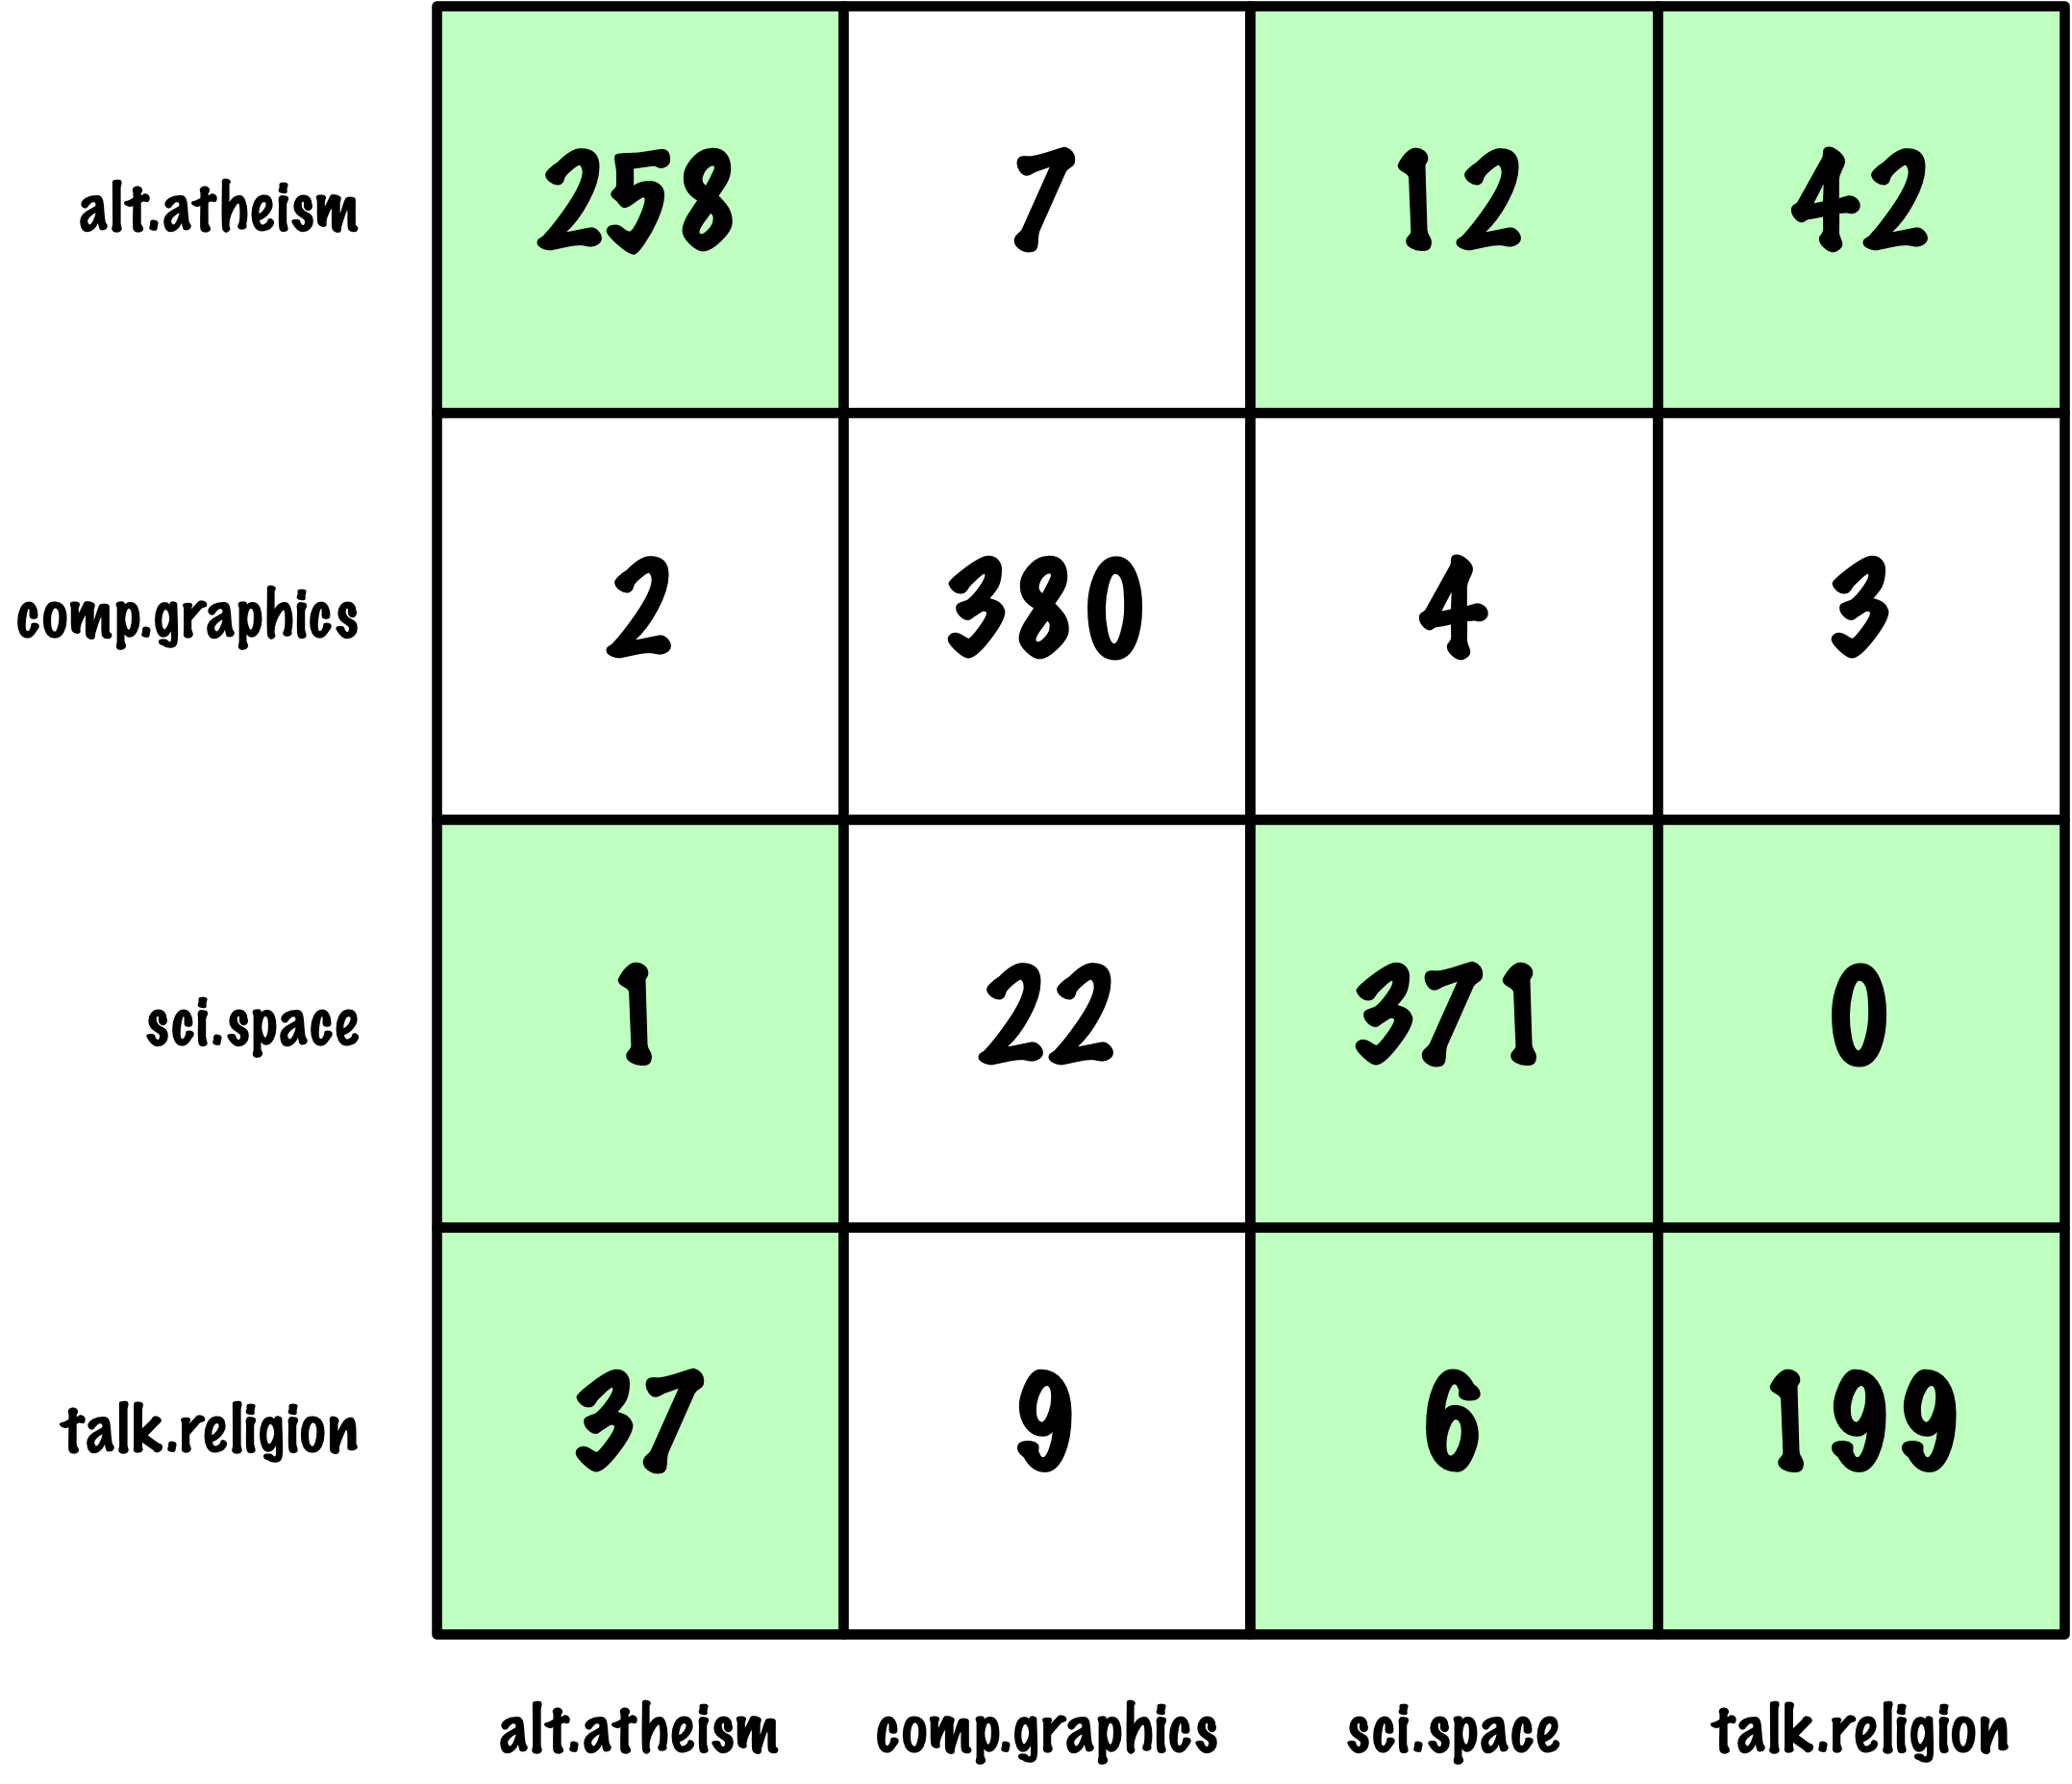

`comp.graphics` is the **true** class ($i$).

## Confusion Matrix - Multi-Class

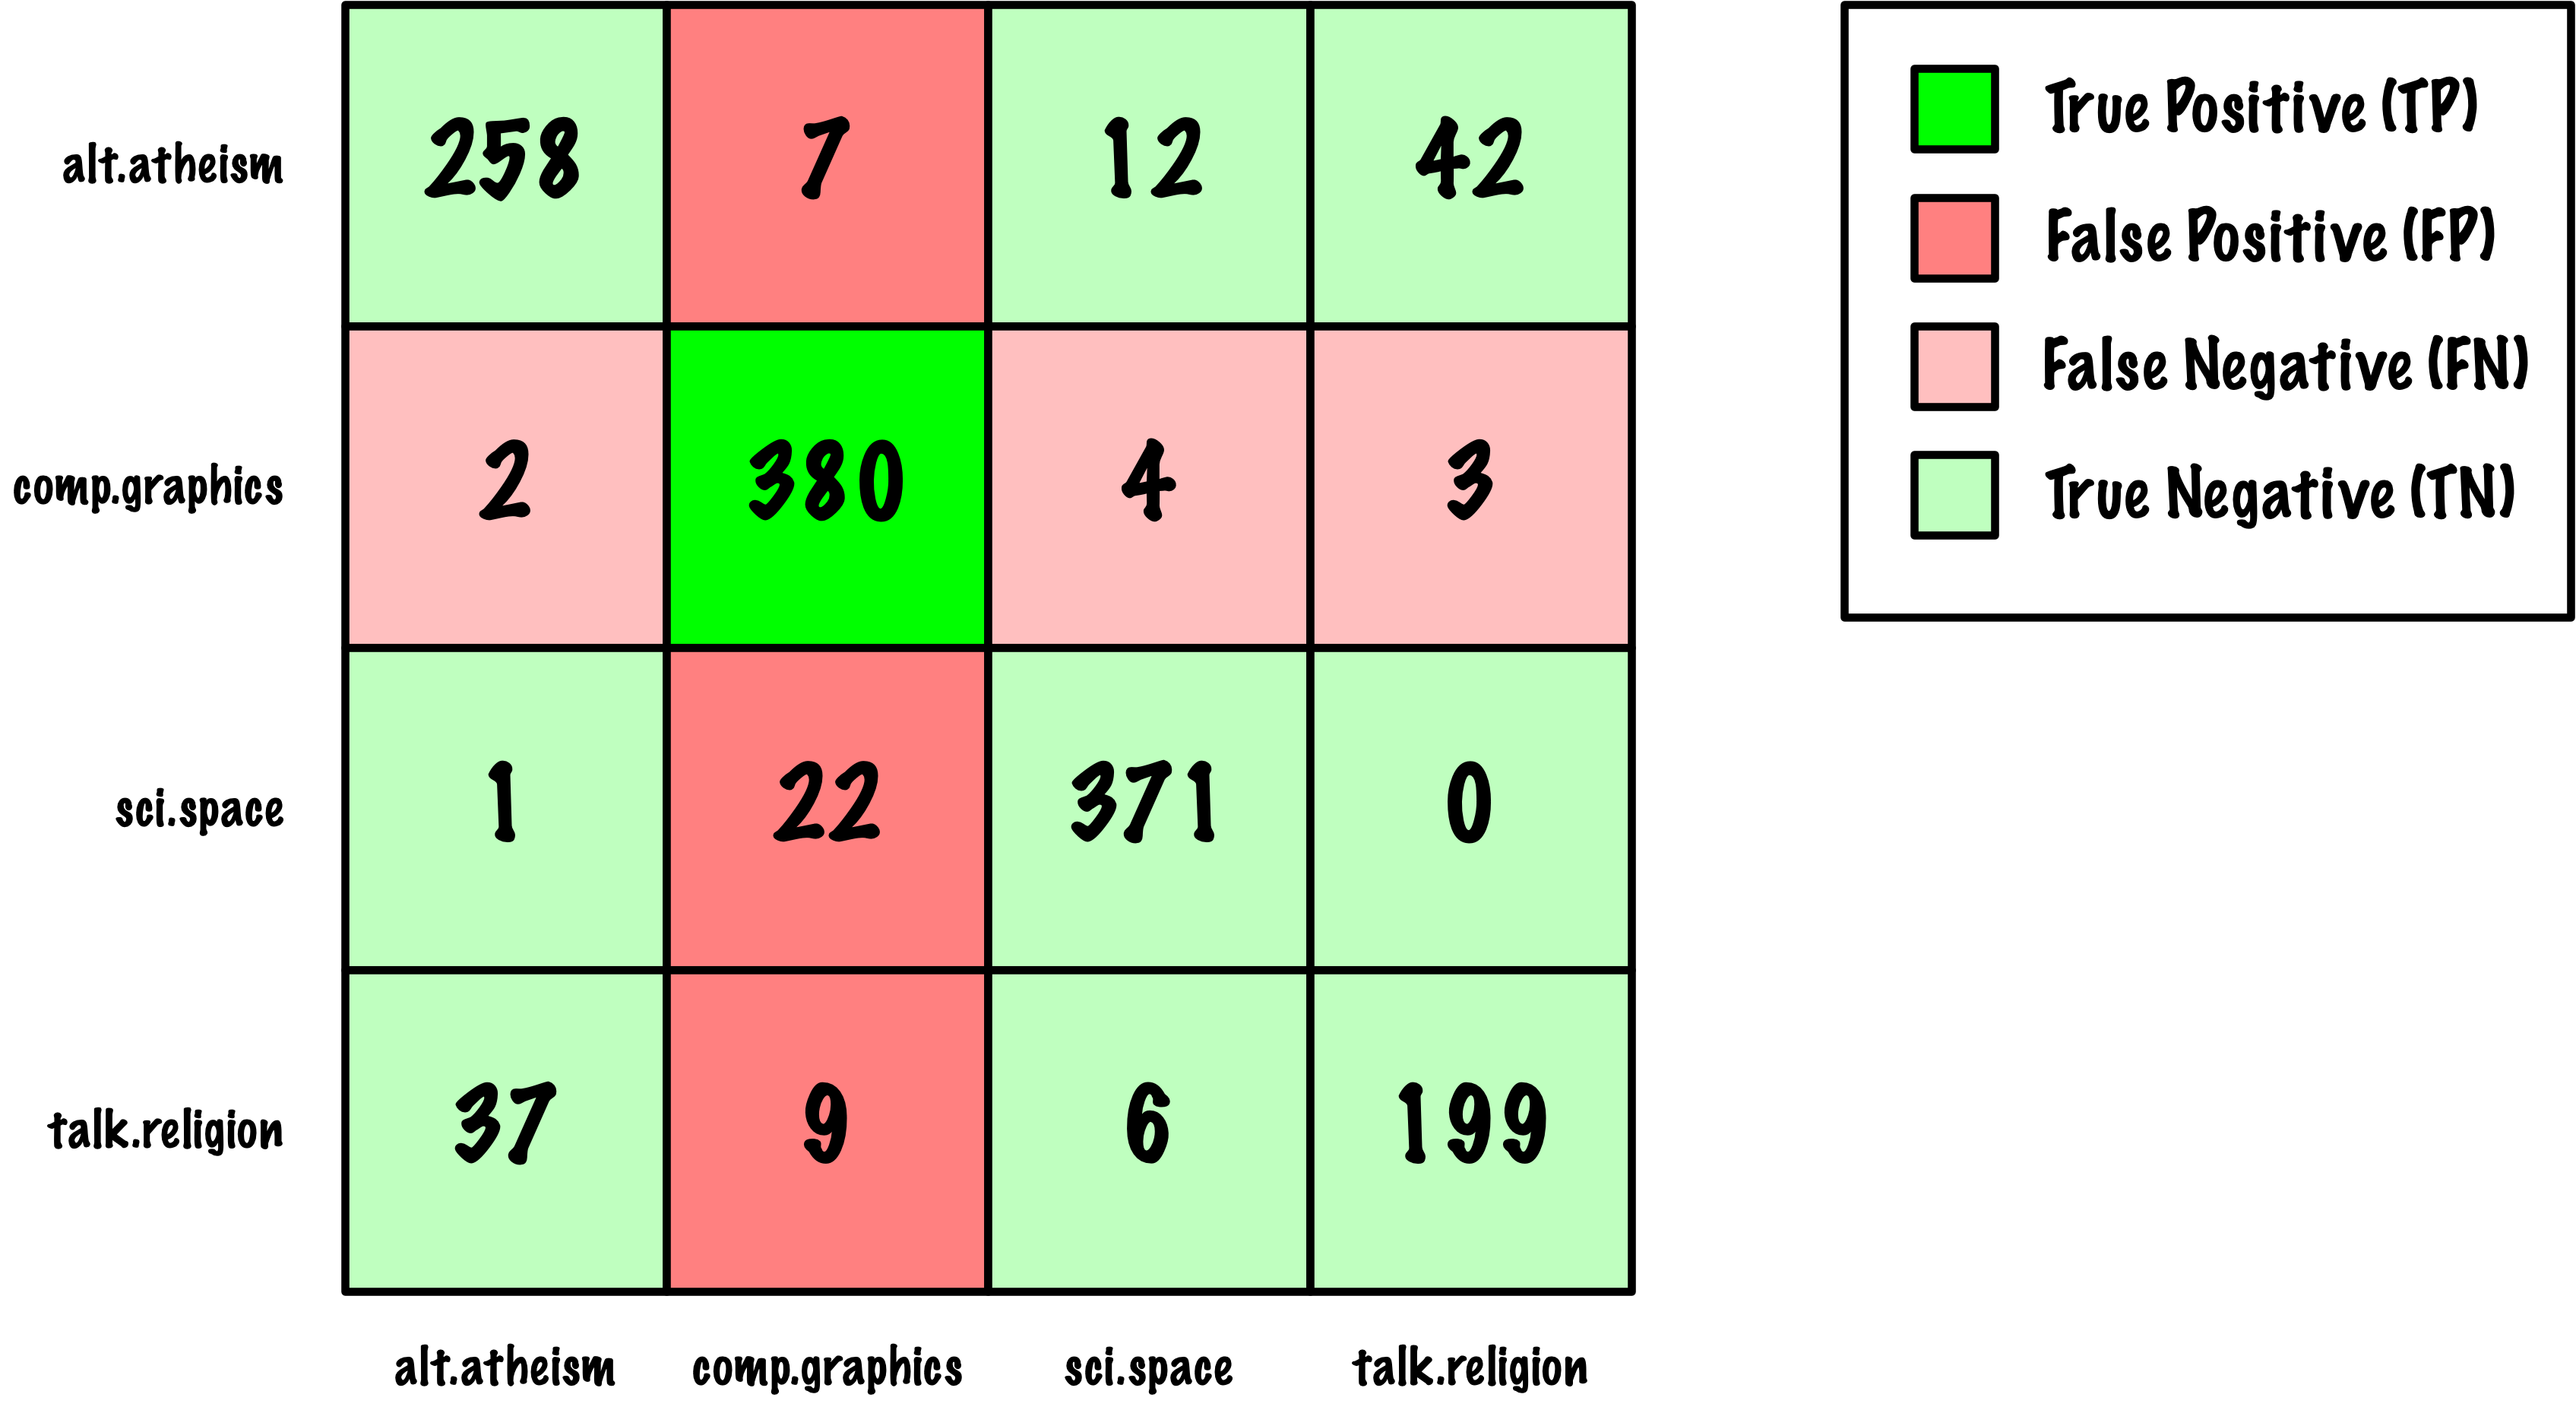

`comp.graphics` is the **true** class ($i$).

## Multi-Class

To evaluate performance in a multi-class setting, one typically derives
“one-vs-all” metrics for each class from the confusion matrix. These
metrics are then averaged using specific weighting schemes.

-   **True Positives** ($\mathrm{TP}_i$): Diagonal entry $C_{i,i}$
-   **False Positives** ($\mathrm{FP}_i$): Sum of column $i$ excluding
    $C_{i,i}$
-   **False Negatives** ($\mathrm{FN}_i$): Sum of row $i$ excluding
    $C_{i,i}$
-   **True Negatives** ($\mathrm{TN}_i$):
    $N - (\mathrm{TP}_i + \mathrm{FP}_i + \mathrm{FN}_i)$

## Multi-Class

To evaluate performance in a multi-class setting, one typically derives
“one-vs-all” metrics for each class from the confusion matrix. These
metrics are then averaged using specific weighting schemes.

-   $\mathrm{TP}_i = C_{i,i}$
-   $\mathrm{FP}_i = \sum_{k \ne i} C_{k,i}$
-   $\mathrm{FN}_i = \sum_{k \ne i} C_{i,k}$
-   $\mathrm{TN}_i = \sum_{j \ne i} \sum_{k \ne i} C_{j,k}$

## sklearn.metrics.confusion_matrix

In [2]:
from sklearn.metrics import confusion_matrix

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

confusion_matrix(y_actual,y_pred)

array([[1, 2],
       [3, 4]])

. . .

In [3]:
tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel().tolist()
(tn, fp, fn, tp)

(1, 2, 3, 4)

By default, `sklearn.metrics.confusion_matrix` determines the set of
labels from the data ($\textrm{y_true} \cup \textrm{y_pred}$), and then:

-   It sorts them in ascending order (which for strings or mixed types
    corresponds to Python’s lexicographic ordering).
-   It then builds the matrix so that row `i` corresponds to the true
    class with label `labels[i]`, and column `j` corresponds to the
    predicted class with label `labels[j]`.

So if you don’t pass `labels=...`, you may get a confusion matrix with
class order that is not what you expect — especially if your classes are
strings, or if you assume the order follows the order of appearance in
the dataset.

**Example**

``` python
from sklearn.metrics import confusion_matrix

y_true = ["dog", "cat", "cat", "dog"]
y_pred = ["dog", "dog", "cat", "cat"]

print(confusion_matrix(y_true, y_pred))
```

Output:

    [[1 1]
     [1 1]]

Here the rows/columns are in lexicographic order: `["cat", "dog"]`. So
the matrix is:

-   Row 0: true = “cat”
-   Row 1: true = “dog”

**Controlling order**

To force a specific order, you should pass the labels argument:

``` python
confusion_matrix(y_true, y_pred, labels=["dog", "cat"])
```

This will swap the row/column order accordingly.

## Perfect Prediction

In [4]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

confusion_matrix(y_actual,y_pred)

array([[4, 0],
       [0, 6]])

. . .

In [5]:
tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel().tolist()  
(tn, fp, fn, tp)

(4, 0, 0, 6)

When an algorithm achieves perfect classification accuracy, all non-zero
values in the confusion matrix appear exclusively along its diagonal.

All off-diagonal entries, which represent misclassifications, will be
zero.

## Confusion Matrix - Multiple Classes

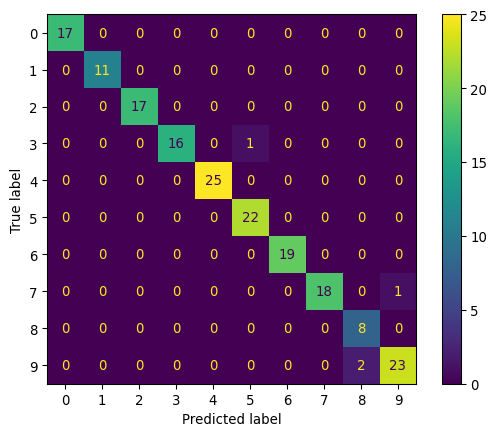

In [6]:
from sklearn.datasets import load_digits

import numpy as np
np.random.seed(42)

digits = load_digits()

X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression())

clf = clf.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

**Confusion matrix** for the **digits example** presented in the
previous lecture.

The image displays a heatmap of the confusion matrix for the digit
classification task. This task, a multiclass classification problem, was
addressed using `OneVsRestClassifier` and `LogisticRegression`.

The confusion matrix summarizes the predictions made on the test set,
which is a subset of the data that was neither used for training nor for
preprocessing with `StandardScaler`.

The confusion matrix encapsulates all the results from applying the
classifier to the test set. However, to summarize this information more
succinctly, we often refer to performance metrics.

## Visualizing errors

In [7]:
mask = (y_test == 9) & (y_pred == 8)

X_9_as_8 = X_test[mask]

y_9_as_8 = y_test[mask]

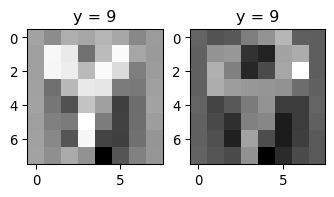

In [8]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression())

clf = clf.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)

mask = (y_test == 9) & (y_pred == 8)

X_9_as_8 = X_test[mask]

y_9_as_8 = y_test[mask]

import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))

for index, (image, label) in enumerate(zip(X_9_as_8, y_9_as_8)):
    plt.subplot(1, len(X_9_as_8), index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f'y = {label}')

In the confusion matrix on the previous screen, we had seen that there
were examples for which the true label was 9, but the prediction was was
8. We can visualize the examples to see if we understand the nature of
those errors.

## Confusion Matrix - Multiple Classes

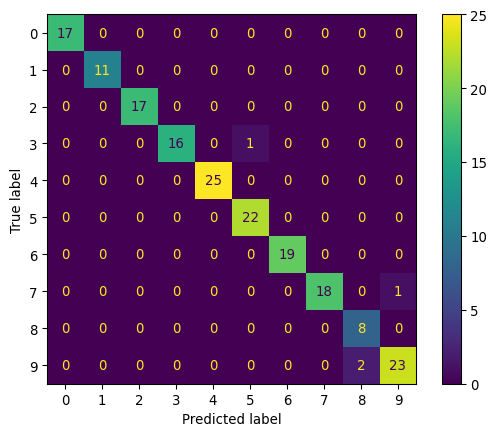

It is often preferable to summarize the classifier’s performance with a
single metric.

## Accuracy

How **accurate** is this result?

$$
  \mathrm{accuracy} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{TP}+\mathrm{TN}+\mathrm{FP}+\mathrm{FN}} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{N}}
$$

In [10]:
from sklearn.metrics import accuracy_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

accuracy_score(y_actual,y_pred)

0.5

**Accuracy** is the ratio of correctly predicted instances to the total
number of predictions.

## Accuracy

In [11]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [1, 0, 1, 1, 0, 0, 0, 1, 0, 0]

accuracy_score(y_actual,y_pred)

0.0

In [12]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

accuracy_score(y_actual,y_pred)

1.0

**Accuracy** is a number between 0 (all wrong) and 1 (perfect).

## Accuracy can be misleading

In [13]:
y_actual = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
y_pred   = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

accuracy_score(y_actual,y_pred)

0.8

**Why** is it problematic?

Accuracy can be misleading in the context of **class imbalance**, as it
disproportionately reflects the performance on the majority class,
thereby masking poor performance on the minority class.

As **class imbalance increases**, the accuracy metric becomes
**increasingly misleading**.

## Precision

AKA, **positive predictive value** (PPV).

$$
  \mathrm{precision} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}
$$

In [14]:
from sklearn.metrics import precision_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

precision_score(y_actual, y_pred)

0.6666666666666666

**Precision** is the proportion of **true positive predictions** among
**all positive predictions**.

Can you think of a problem or situation where precision is paramount?

A classic example: **medical screening for a rare but serious disease**.

-   Suppose you have a test for a disease with very low prevalence (say
    1 in 10,000).
-   If your model predicts “positive” too loosely, you will generate
    many false positives.
-   Here, precision (the proportion of predicted positives that are
    actually true positives) is crucial:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

-   A high precision means that when the test says “positive,” it is
    very likely correct.
-   This reduces unnecessary anxiety, costs, and follow-up procedures
    for patients incorrectly flagged.

Other real-world settings where precision is key:

-   Spam detection: High precision ensures that emails classified as
    spam are really spam (minimizing false positives that would hide
    real emails).
-   Legal document search / e-discovery: High precision ensures that
    returned documents are relevant, reducing time wasted on irrelevant
    results.
-   Recommender systems: High precision means that recommended items are
    very likely to be of interest, improving user trust.

## Precision alone is not enough

In [15]:
y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

precision_score(y_actual,y_pred)

1.0

An algorithm that makes a small number of high-confidence predictions
might achieve a high precision score, but this may not necessarily be
useful.

## Recall

AKA **sensitivity** or **true positive rate** (TPR) $$
  \mathrm{recall} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
$$

In [16]:
from sklearn.metrics import recall_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

recall_score(y_actual,y_pred)

0.5714285714285714

**Recall** is the proportion of true positive instances correctly
identified among all actual positive instances.

Can you think of a problem or situation where recall is paramount?

An example where recall is the critical measure: **cancer diagnosis
(screening for malignant tumors)**.

-   Here, false negatives (missing an actual cancer case) are far more
    dangerous than false positives.
-   Recall measures the proportion of actual positives correctly
    identified:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

-   A high recall means the test finds nearly all patients with cancer,
    even if it also produces some false alarms.
-   Missing a true case (low recall) could mean a patient doesn’t
    receive treatment in time — a much more serious error than
    investigating a few extra false positives.

Other real-world settings where recall matters most:

-   Security / Intrusion detection: Better to flag all suspicious
    activity (even with false positives) than miss a real attack.
-   Search engines: For certain queries (e.g., legal precedent search,
    medical literature search), recall ensures you retrieve all relevant
    documents.
-   Emergency response systems: For natural disaster warnings, high
    recall ensures no real threat goes unnoticed.

## F$_1$ score

$$
\begin{align*}
  F_1~\mathrm{score} &= \frac{2}{\frac{1}{\mathrm{precision}}+\frac{1}{\mathrm{recall}}} = 2 \times \frac{\mathrm{precision}\times\mathrm{recall}}{\mathrm{precision}+\mathrm{recall}} \\
                     &= \frac{\mathrm{TP}}{\mathrm{FP}+\frac{\mathrm{FN}+\mathrm{FP}}{2}}
\end{align*}
$$

In [17]:
from sklearn.metrics import f1_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

f1_score(y_actual,y_pred)

0.6153846153846154

**F$_1$** is the **harmonic mean** of precision and recall.

-   The harmonic mean places greater emphasis on lower values, while the
    arithmetic mean treats all values equally.
-   Using the harmonic mean ensures that a high score is only achieved
    when both precision and recall are high, thus providing a more
    holistic measure of a classifier’s performance in scenarios with
    imbalanced datasets.
-   The F$_1$ score favors classifiers that achieve a balance between
    precision and recall.
-   Increasing **recall** often results in a decrease in **precision**,
    and vice versa. This phenomenon is known as the **precision/recall
    trade-off**.

# Micro and Macro Averaging

## Definition

The **class imbablance problem** is a scenario where the number of
instances in one class significantly outnumbers the instances in other
classes.

. . .

Models tend to be biased towards the **majority class**, leading to
**poor performance on the minority class**.

Standard evaluation metrics like accuracy may be misleading in the
presence of class imbalance.

## Micro Performance Metrics

-   Micro performance metrics **aggregate the contributions of all
    instances to compute average performance metrics** like precision,
    recall, or F1 score.
-   This approach **treats each individual prediction equally**,
    regardless of its class, as it considers the total number of true
    positives, false positives, and false negatives across all classes.
-   Consequently, micro metrics are particularly **sensitive to the
    performance on frequent classes** because they are more numerous and
    thus have a greater influence on the overall metric.

## Macro Performance Metrics

-   Macro performance metrics **compute the performance metric
    independently for each class and then average these metrics**.
-   This approach **treats each class equally**, regardless of its
    frequency, providing an evaluation that equally considers
    performance across both frequent and infrequent classes.
-   Consequently, macro metrics are less **sensitive to the performance
    on frequent classes**.

## Multi-Class

When calculating **precision**, **recall**, and $F_1$, one usually
compute “one-vs-all” metrics for each class. Then, average them using
weighting schemes (macro, micro).

-   **True Positives** ($\mathrm{TP}_i$): Diagonal entry $C_{i,i}$
-   **False Positives** ($\mathrm{FP}_i$): Sum of column $i$ excluding
    $C_{i,i}$
-   **False Negatives** ($\mathrm{FN}_i$): Sum of row $i$ excluding
    $C_{i,i}$
-   **True Negatives** ($\mathrm{TN}_i$):
    $N - (\mathrm{TP}_i + \mathrm{FP}_i + \mathrm{FN}_i)$

## Multi-Class

When calculating **precision**, **recall**, and $F_1$, one usually
compute “one-vs-all” metrics for each class. Then, average them using
weighting schemes (macro, micro).

-   $\mathrm{TP}_i = C_{i,i}$
-   $\mathrm{FP}_i = \sum_{k \ne i} C_{k,i}$
-   $\mathrm{FN}_i = \sum_{k \ne i} C_{i,k}$
-   $\mathrm{TN}_i = \sum_{j \ne i} \sum_{k \ne i} C_{j,k}$

## Micro/Macro Metrics

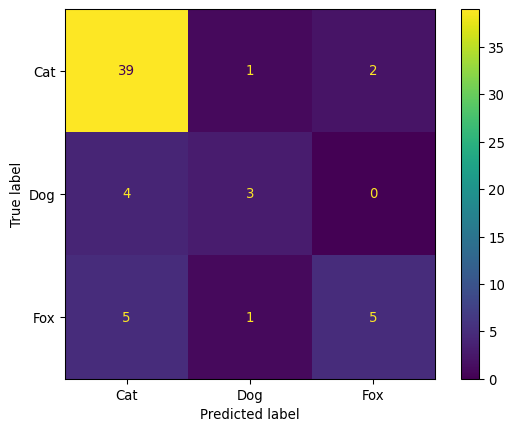

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

# Sample data
y_true = ['Cat'] * 42 + ['Dog'] *  7 + ['Fox'] * 11
y_pred = ['Cat'] * 39 + ['Dog'] *  1 + ['Fox'] *  2 + \
         ['Cat'] *  4 + ['Dog'] *  3 + ['Fox'] *  0 + \
         ['Cat'] *  5 + ['Dog'] *  1 + ['Fox'] *  5

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

The dataset can be conceptualized as resulting from an **image
classification task**, involving images of **cats**, **dogs**, and
**foxes**. Reflecting common trends observed on the internet, images of
cats are disproportionately represented, leading to a **class
imbalance** issue.

## Micro/Macro Precision

In [19]:
from sklearn.metrics import classification_report, precision_score

print(classification_report(y_true, y_pred), "\n")

print("Micro precision: {:.2f}".format(precision_score(y_true, y_pred, average='micro')))
print("Macro precision: {:.2f}".format(precision_score(y_true, y_pred, average='macro')))

              precision    recall  f1-score   support

         Cat       0.81      0.93      0.87        42
         Dog       0.60      0.43      0.50         7
         Fox       0.71      0.45      0.56        11

    accuracy                           0.78        60
   macro avg       0.71      0.60      0.64        60
weighted avg       0.77      0.78      0.77        60
 

Micro precision: 0.78
Macro precision: 0.71

## Micro/Macro Precision

-   **Macro-average precision** is calculated as the mean of the
    **precision** scores[1] for each class:
    $\frac{0.81 + 0.60 + 0.71}{3} = 0.71$.

-   Whereas, the **micro-average precision** is calculated using the
    formala, $\frac{TP}{TP+FP}$ and the **data from the entire confusion
    matrix** $\frac{39+3+5}{39+3+5+9+2+2} = \frac{47}{60} = 0.78$

The high micro-average precision observed here is primarily due to the
high precision and large number of examples in the majority class, Cat.
This masks the classifier’s relatively poor performance on the minority
classes, Dog and Fox.

In a balanced dataset, both micro-average and macro-average metrics
yield similar scores.

However, in an imbalanced dataset, significant disparities in classifier
performance between the majority and minority classes will result in
divergent micro-average and macro-average scores. Specifically, the
classifier tends to underperform on the minority class(es), leading to
these discrepancies.

In **macro-average metrics**, each class contributes equally to the
final metric calculation, **irrespective of the number of examples it
contains**. This means that the performance metric for each class are
computed independently and then averaged, without considering the
proportion of instances that each class represents in the dataset.
Consequently, macro-averaging ensures that **each class has an equal
impact on the overall metric**, which can be particularly useful in
cases where the class distribution is imbalanced.

## Micro/Macro Recall

[1] Therefore, macro-average precision remains unaffected by the varying
number of examples across different classes.

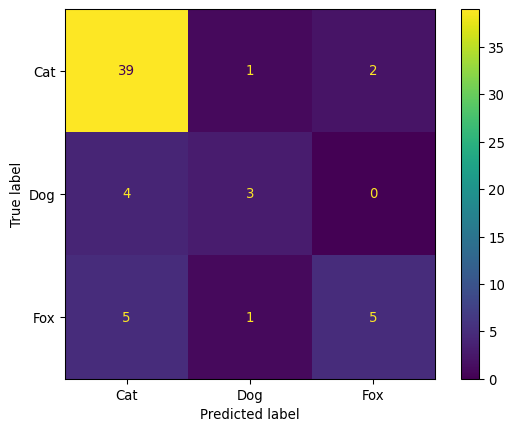

              precision    recall  f1-score   support

         Cat       0.81      0.93      0.87        42
         Dog       0.60      0.43      0.50         7
         Fox       0.71      0.45      0.56        11

    accuracy                           0.78        60
   macro avg       0.71      0.60      0.64        60
weighted avg       0.77      0.78      0.77        60
 

Micro recall: 0.78
Macro recall: 0.60

## Micro/Macro Recall

-   **Macro-average** recall is calculated as the **mean of the recall
    scores for each class**: $\frac{0.93 + 0.43 + 0.45}{3} = 0.60$.

-   Whereas, the **micro-average** recall is calculated using the
    formala, $\frac{TP}{TP+FN}$ and the **data from the entire confusion
    matrix** $\frac{39+3+5}{39+3+5+3+4+6} = \frac{39}{60} = 0.78$

## Example

Using the [20 newsgroups text
dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups)
from [scikit-learn.org](https://scikit-learn.org).

Comprises around 18,000 newsgroups posts on 20 topics.

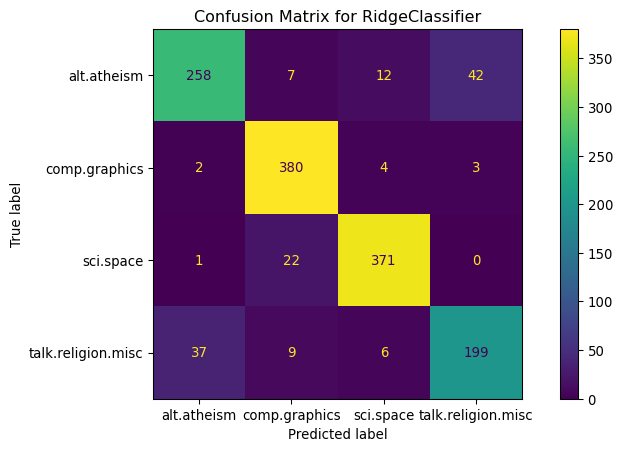

In [22]:
## https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html

from time import time

## Load Dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6

def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        # print(
        #     f"{len(data_train.data)} documents - "
        #     f"{data_train_size_mb:.2f}MB (training set)"
        # )
        # print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        # print(f"{len(target_names)} categories")
        # print(
        #     f"vectorize training done in {duration_train:.3f}s "
        #     f"at {data_train_size_mb / duration_train:.3f}MB/s"
        # )
        # print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        # print(
        #     f"vectorize testing done in {duration_test:.3f}s "
        #     f"at {data_test_size_mb / duration_test:.3f}MB/s"
        # )
        # print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

## Training and Prediction

from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Display the Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}"
)

## Example

In [23]:
cm = confusion_matrix(y_test, y_pred)

## TP, FP, FN, TN

In [24]:
def true_positive(cm, i):
    return cm[i,i] # diagonal entry i,i

def false_positive(cm, i):
    return np.sum(cm[:, i]) - cm[i,i] # col - TP_i

def false_negative(cm, i):
    return np.sum(cm[i, :]) - cm[i,i] # row - TP_i

def true_negative(cm, i):
  N = cm.sum()
  TP = true_positive(cm, i)
  FP = false_positive(cm, i)
  FN = false_negative(cm, i)
  return N - (TP + FP + FN)

## Precision

In [25]:
def precision_micro(cm):
    _, l = cm.shape
    tp = fp = 0
    for i in range(l):
        tp += true_positive(cm, i)
        fp += false_positive(cm, i)
    return tp / (tp+fp)

def precision_macro(cm):
    _, l = cm.shape
    precision = 0
    for i in range(l):
        tp = true_positive(cm, i)
        fp = false_positive(cm, i)
        precision += tp/(tp+fp)
    return precision/l

## Precision Micro Average

$$
  \frac{(258+380+371+199)}{(258+380+371+199)+(40+38+22+45)}
$$ where

-   40 = 2 + 1 + 37
-   38 = 7 + 22 + 9
-   22 = 12 + 4 + 6
-   45 = 42 + 3 + 0

89.28307465 %

## Precision Macro Average

-   $\mathrm{Precision}_0 = \frac{258}{258+(2+1+37)} = 0.8657718121$
-   $\mathrm{Precision}_1 = \frac{380}{380+(7+22+9)} = 0.9090909091$
-   $\mathrm{Precision}_2 = \frac{371}{371+(12+4+6)} = 0.9440203562$
-   $\mathrm{Precision}_3 = \frac{199}{199+(42+3+0)} = 0.8155737705$

$\mathrm{Precision}_3 = \frac{0.8657718121 + 0.9090909091 + 0.9440203562 + 0.8155737705}{4}$

88.3614212 %

## Recall

In [26]:
def recall_micro(cm):
    _, l = cm.shape
    tp = fn = 0
    for i in range(l):
        tp += true_positive(cm, i)
        fn += false_negative(cm, i)
    return tp / (tp+fn)

def recall_macro(cm):
    _, l = cm.shape
    recall = 0
    for i in range(l):
        tp = true_positive(cm, i)
        fn = false_negative(cm, i)
        recall += tp / (tp+fn)
    return recall/l

## Micro/Macro Metrics (Medical Data)

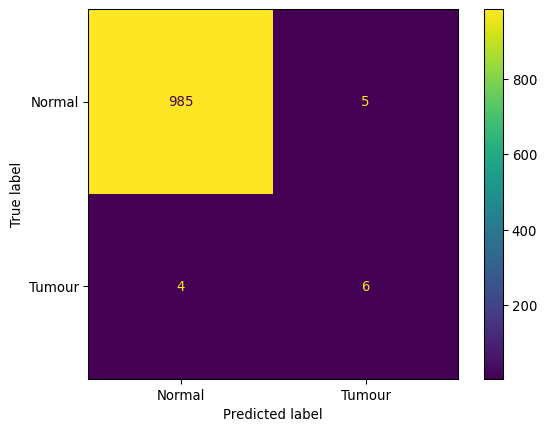

Consider a medical dataset, such as those involving diagnostic tests or
imaging, comprising 990 normal samples and 10 abnormal (tumor) samples.
This represents the ground truth.

## Micro/macro metrics (medical data)

              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       990
      Tumour       0.55      0.60      0.57        10

    accuracy                           0.99      1000
   macro avg       0.77      0.80      0.78      1000
weighted avg       0.99      0.99      0.99      1000
 

Micro precision: 0.99
Macro precision: 0.77


Micro recall: 0.99
Macro recall: 0.80

The precision for the `Tumour` class is low. However, due to the small
sample size, this does not significantly impact the micro-averaged
precision.

# Precision-Recall Trade-Off

## Hand-Written Digits (Revisited)

Loading the dataset

In [29]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import fetch_openml

digits = fetch_openml('mnist_784', as_frame=False)
X, y = digits.data, digits.target

Plotting the first five examples

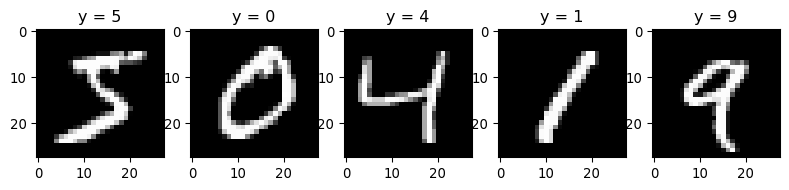

These images have dimensions of $28 \times 28$ pixels.

## Creating a Binary Classification Task

In [31]:
# Creating a binary classification task (one vs the rest)

some_digit = X[0]
some_digit_y = y[0]

y = (y == some_digit_y)
y

array([ True, False, False, ..., False,  True, False], shape=(70000,))

. . .

In [32]:
# Creating the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## `SGDClassifier`

In [33]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)

clf.predict(X[0:5]) # small sanity check

array([ True, False, False, False, False])

The `SGDClassifier` is a linear classifier that utilizes stochastic
gradient descent (SGD) for training. Compared to `LogisticRegression`,
it can offer faster training times, particularly for large datasets.
Additionally, `SGDClassifier` allows for the adjustment of the decision
threshold in subsequent examples.

## Performance

In [34]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9572857142857143

Wow!

## Not so Fast

In [35]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()

dummy_clf.fit(X_train, y_train)

. . .

In [36]:
y_pred = dummy_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.906

The
[DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
in scikit-learn generates predictions without considering the input
features. By default, it consistently predicts the most frequent class
label in the training data. It is a simple baseline classifier.

Why is the accuracy so high despite this classifier ignoring the input
data?

The high accuracy is attributed to the class distribution within the
dataset. Approximately 10% of the samples correspond to the digit ‘5’,
which is the positive class in our binary classification task.
Consequently, about 90% of the samples are ‘not 5’ and belong to the
negative class. Since the DummyClassifier always predicts the majority
class, its accuracy is expected to be around 90%.

This underscores the point that accuracy is often not the best metric,
particularly when dealing with imbalanced datasets.

## Precision-Recall Trade-Off

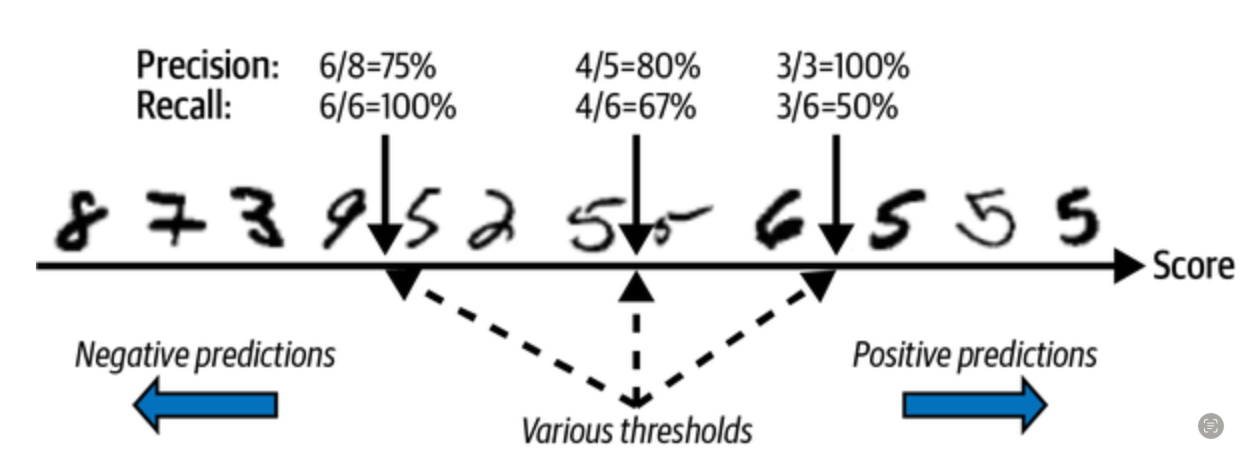

**Attribution**: Géron (2022) Figure 3.4

## Precision-Recall Trade-Off

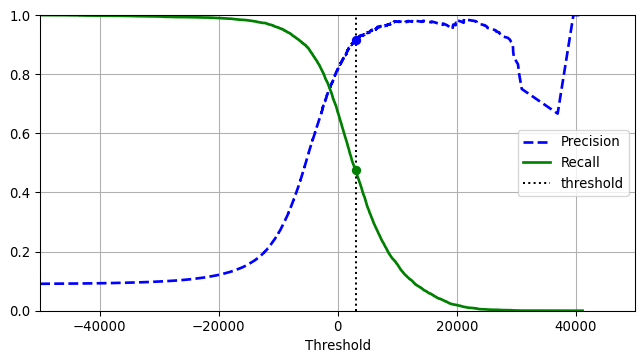

In [37]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, X_train, y_train, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

threshold = 3000

plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

`SGDClassifier` is used because it allows to vary the decision treshold
(boundary) to produce a plot illustrating the precision-recall tradeoff.
(Géron 2022)
[`03_classification.ipynb`](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb).

As the decision threshold decreases, a higher number of examples are
predicted as positive, potentially leading the classifier to eventually
label all instances as positive.

Conversely, as the decision threshold increases, fewer examples are
classified as positive, which may result in the classifier predicting no
positive instances at all.

For certain applications, a classifier with high precision is essential.
For example, consider a scenario where each prediction necessitates a
costly laboratory experiment to verify its accuracy, such as in a
pharmaceutical company aiming to discover new drugs. Here, the
classifier predicts whether a compound is active. Given the high cost of
experiments to validate candidates, the company would prioritize
focusing on the most promising compounds first.

In contrast, consider a scenario involving cancer screening, such as
using mammograms to detect breast cancer. In this case, it may be
preferable to lower the decision threshold, thereby increasing the
number of false-positive predictions. Although this approach results in
more patients undergoing additional tests, such as biopsies, it can
potentially save more lives by ensuring that fewer cases of cancer go
undetected.

## Precision/Recall Curve

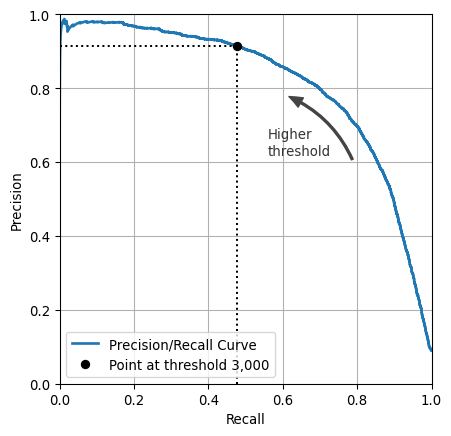

In [38]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(5, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

(Géron 2022)
[`03_classification.ipynb`](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb).

# ROC Curve

## ROC Curve

**Receiver Operating Characteristics (ROC) curve**

-   **True positive rate** (TPR) against **false positive rate** (FPR)
-   An ideal classifier has **TPR** close to **1.0** and **FPR** close
    to **0.0**
-   $\mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$
    (recall, sensitivity)
-   **TPR** approaches **one** when the number of **false negative**
    predictions is low
-   $\mathrm{FPR} = \frac{\mathrm{FP}}{\mathrm{FP}+\mathrm{TN}}$
    (aka~\[1-specificity\])
-   **FPR** approaches **zero** when the number of **false positive** is
    low

ROC (Receiver Operating Characteristic) curves are popular in machine
learning and statistics for several reasons:

1.  **Comprehensive Performance Evaluation**: ROC curves provide a
    visual representation of a classifier’s performance across all
    possible thresholds. By plotting the True Positive Rate (TPR)
    against the False Positive Rate (FPR), it allows practitioners to
    evaluate the trade-off between sensitivity (recall) and specificity.
2.  **Threshold Independence**: Unlike metrics like accuracy, ROC curves
    evaluate classifier performance without relying on a specific
    decision threshold. This makes them particularly useful in comparing
    models across varying thresholds.
3.  **Area Under the Curve (AUC)**: The Area Under the ROC Curve (AUC)
    provides a single value summary of the model’s performance. AUC-ROC
    is often used as a benchmark metric to compare different models,
    with values ranging from 0.5 (random guessing) to 1.0 (perfect
    classification).
4.  **Broad Applicability**: ROC curves can be used for any binary
    classification task and are easily extended to multiclass problems
    using techniques like one-vs-rest classification, making them
    versatile in evaluating classifiers.

## ROC Curve

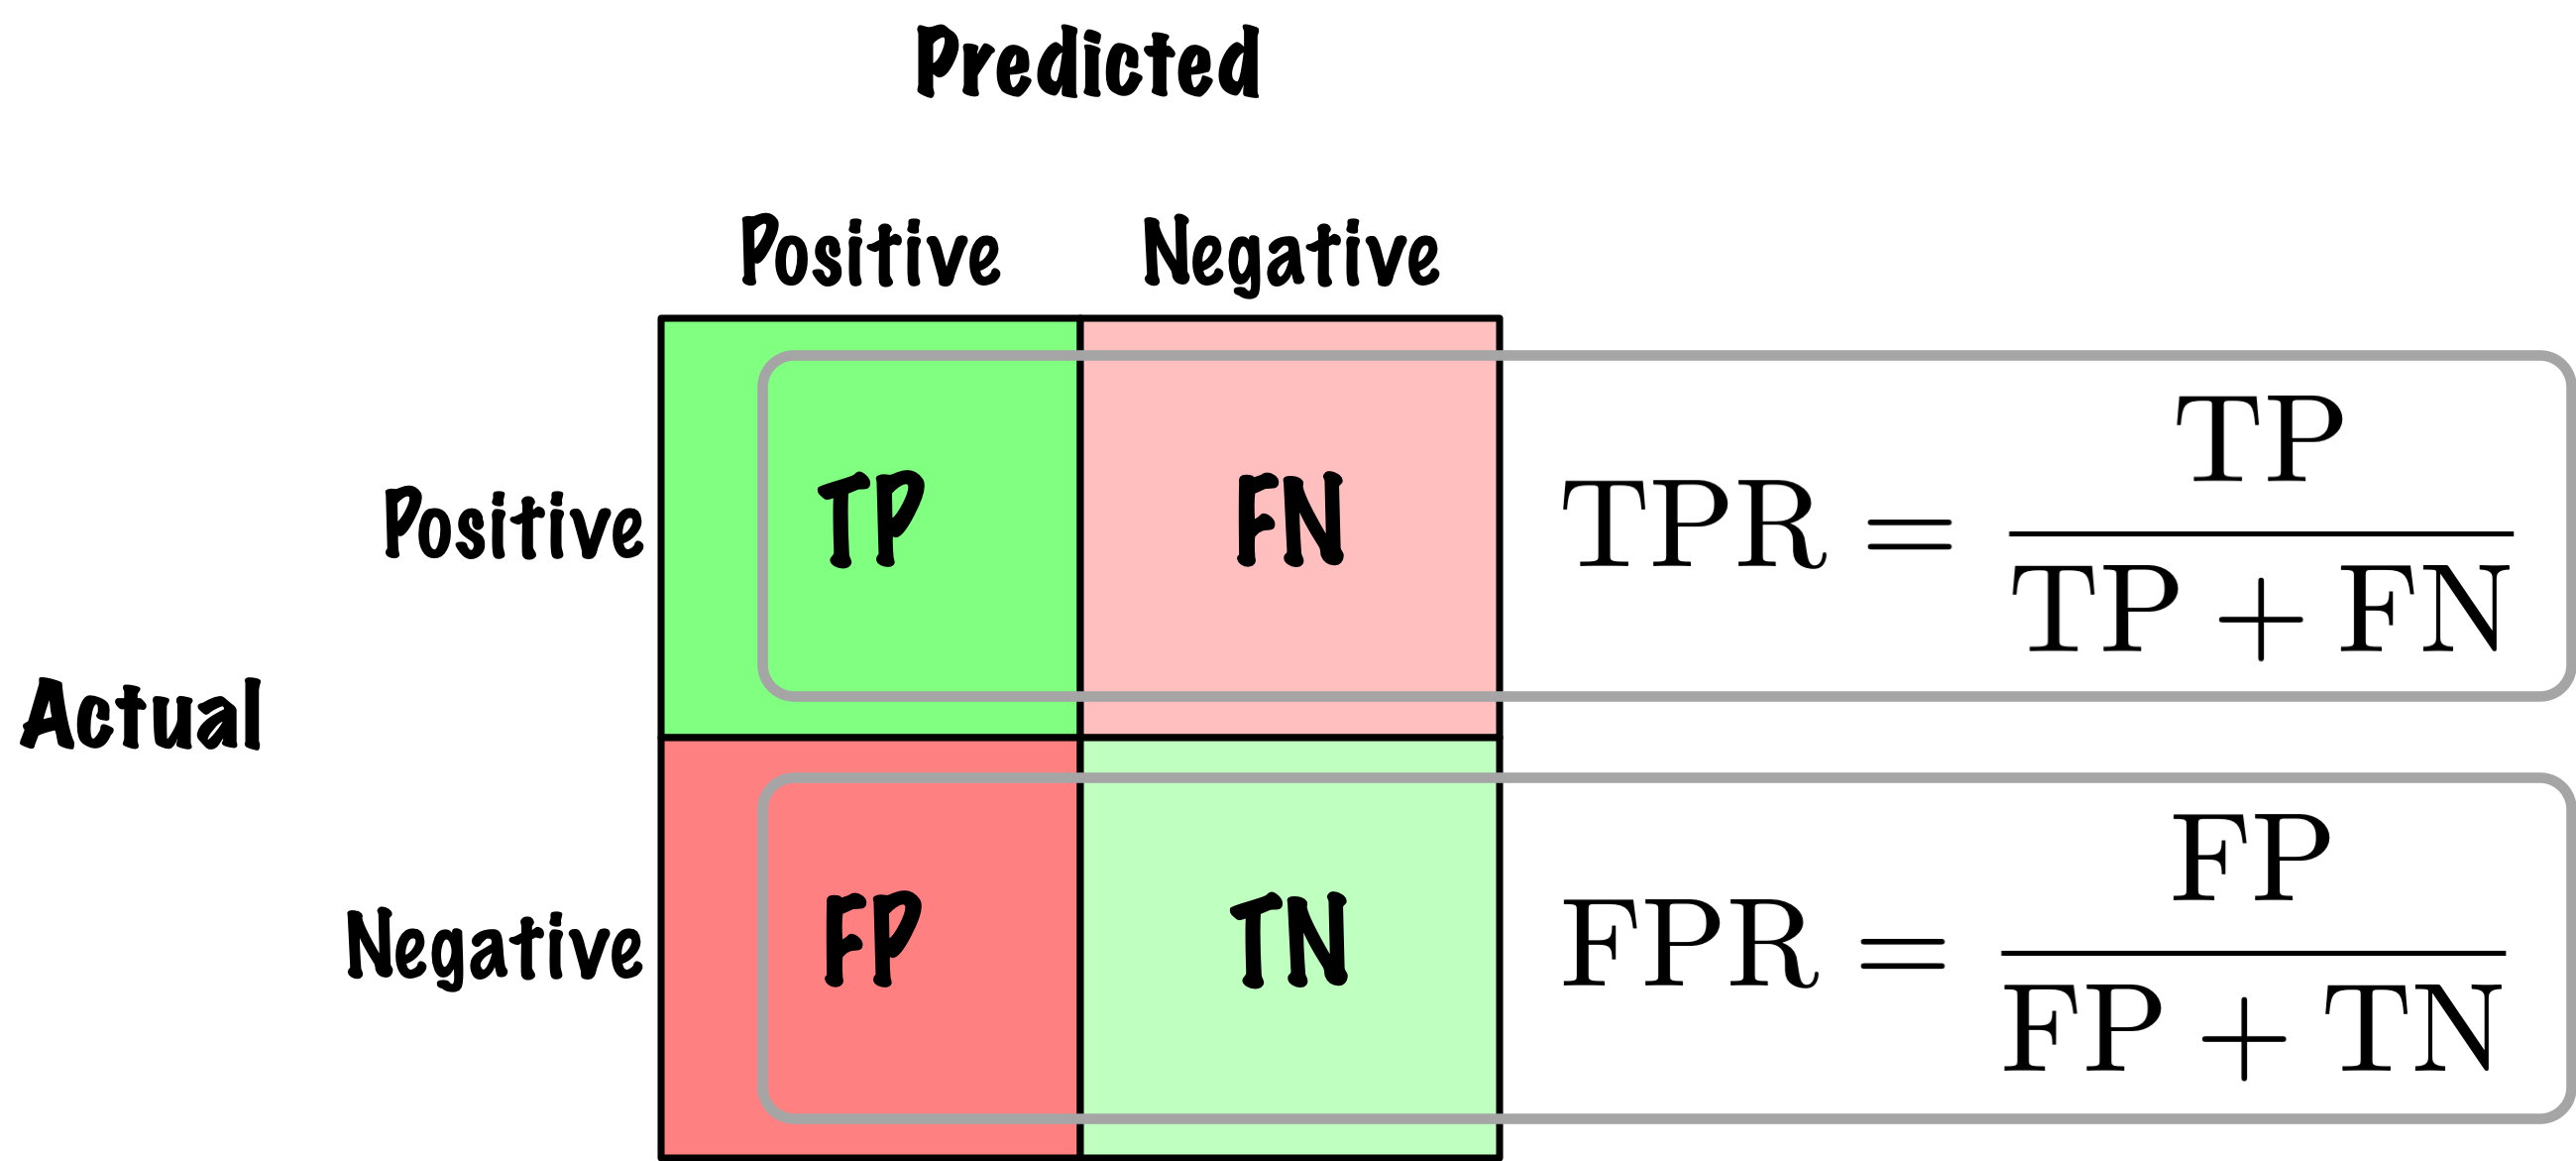

## ROC Curve

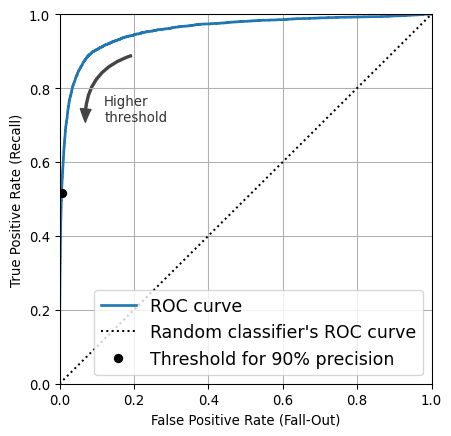

In [39]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(5, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

**Attribution:**
[03_classification.ipynb](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb)

It is common to measure the area under the curve, represented as AUC.
Specifically, the area under the ROC curve. This allows to compare

## Dataset - openml

> ** [www.openml.org](https://www.openml.org)**
>
> OpenML is an open platform for sharing datasets, algorithms, and
> experiments - to learn how to learn better, together.

. . .

In [40]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import fetch_openml

diabetes = fetch_openml(name='diabetes', version=1)
print(diabetes.DESCR)

Today’s dataset is the PIMA dataset, which contains 768 instances and 8
numerical attributes. The numerical nature of these attributes
facilitates our analysis. Additionally, since the data originates from a
published paper, it likely reflects careful data collection, potentially
leading to robust results, as the authors would have needed high-quality
data to support their publication.

## Pima Indians Diabetes Dataset

In [41]:
from sklearn.datasets import fetch_openml

# Load the Pima Indians Diabetes dataset
pima = fetch_openml(name='diabetes', version=1, as_frame=True)

# Extract the features and target
X = pima.data
y = pima.target

# Convert target labels 'tested_negative' and 'tested_positive' to 0 and 1
y = y.map({'tested_negative': 0, 'tested_positive': 1})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[Pima Indians Diabetes
Dataset](https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=diabetes&id=37)
as described in Knowler et al. (1981)
\[[PubMed](https://pubmed.ncbi.nlm.nih.gov/7468572/)\].

## Comparing Multiple Classifiers

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Comparing Multiple Classifiers

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

Using the default parameters.

## AUC/ROC

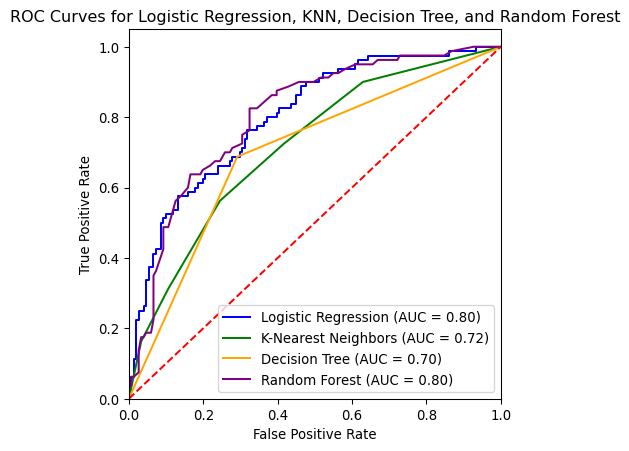

In [44]:
from sklearn.metrics import roc_auc_score

y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

# Compute AUC scores
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC curves
plt.figure(figsize=(5, 5)) # plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='orange', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='purple', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression, KNN, Decision Tree, and Random Forest')
plt.legend(loc="lower right")
plt.show()

ROC curves provide a visual representation of a classifier’s performance
across **all possible thresholds**. By plotting the True Positive Rate
(TPR) against the False Positive Rate (FPR), it allows practitioners to
evaluate the trade-off between sensitivity (recall) and specificity.

Unlike metrics like accuracy, ROC curves evaluate classifier performance
**without relying on a specific decision threshold**. This makes them
particularly useful in **comparing models across varying thresholds**.

## Implementation: Logistic Regression

Below is our implementation of the logistic regression.

In [45]:
def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    """
    Compute the binary cross-entropy cost.
    theta: parameter vector
    X: feature matrix (each row is an example)
    y: true binary labels (0 or 1)
    """
    m = len(y)
    h = sigmoid(X.dot(theta))
    # Add a small epsilon to avoid log(0)
    epsilon = 1e-5
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient(theta, X, y):
    """Compute the gradient of the cost with respect to theta."""
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (1/m) * X.T.dot(h - y)

def logistic_regression(X, y, learning_rate=0.1, iterations=1000):
    """
    Train logistic regression using gradient descent.
    Returns the optimized parameter vector theta and the history of cost values.
    """
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        theta -= learning_rate * gradient(theta, X, y)
        cost_history.append(cost_function(theta, X, y))
    return theta, cost_history

def predict_probabilities(theta, X):
    """Return predicted probabilities for the positive class."""
    return sigmoid(X.dot(theta))

## Implementation: ROC

In [46]:
def compute_roc_curve(y_true, y_scores, thresholds):
    tpr_list, fpr_list = [], []
    for thresh in thresholds:
        # Classify as positive if predicted probability >= threshold
        y_pred = (y_scores >= thresh).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        tpr_list.append(TPR)
        fpr_list.append(FPR)
        
    tpr_list.reverse()
    fpr_list.reverse()

    return np.array(fpr_list), np.array(tpr_list)

## Implementation: AUC ROC

In [47]:
def compute_auc(fpr, tpr):
    """
    Compute the Area Under the Curve (AUC) using the trapezoidal rule.
    
    fpr: array of false positive rates
    tpr: array of true positive rates
    """
    return np.trapezoid(tpr, fpr)

The **Trapezoidal Rule** (`trapezoid`), akin to the **Riemann Sum**, is
a numerical method for approximating the definite integral of a
function. By partitioning the area under the curve into trapezoids
rather than rectangles, it typically yields a more precise
approximation.

## Example: Generate Data + Predictions

In [48]:
# Generate synthetic data for binary classification
np.random.seed(seed)
m = 1000  # number of samples
X = np.random.randn(m, 2)
noise = 0.5 * np.random.randn(m)

# Define labels: a noisy linear combination thresholded at 0
y = (X[:, 0] + X[:, 1] + noise > 0).astype(int)

# Add an intercept term (a column of ones) to X
X_intercept = np.hstack([np.ones((m, 1)), X])

X_train, X_test, y_train, y_test = train_test_split(X_intercept, y, random_state=seed)

# Train logistic regression model using gradient descent
theta, cost_history = logistic_regression(X_train, y_train, learning_rate=0.1, iterations=1000)

## Example: Plot

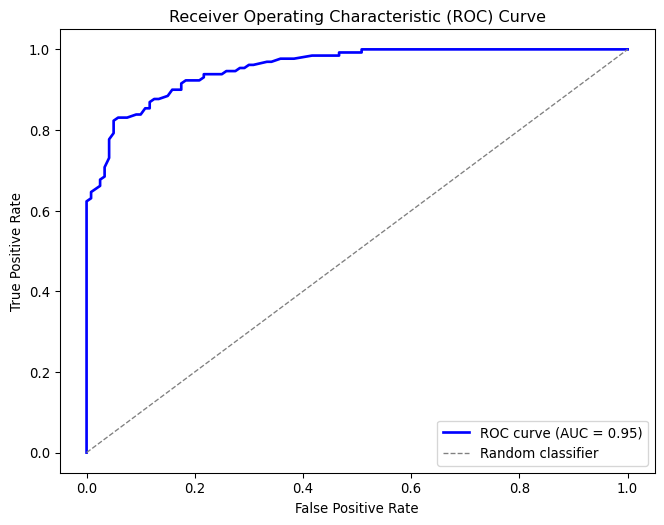

In [49]:
# Compute predicted probabilities for the positive class on the test set
y_probs = predict_probabilities(theta, X_test)

# Define a set of threshold values between 0 and 1 (e.g., 100 equally spaced thresholds)
thresholds = np.linspace(0, 1, 100)

# Compute the ROC curve (FPR and TPR for each threshold)
fpr, tpr = compute_roc_curve(y_test, y_probs, thresholds)
auc_value = compute_auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## See Also

-   [Multiclass Receiver Operating Characteristic
    (ROC)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
    presents examples of micro- and macro- average curves.

# Cross-Validation

## Training and test set

Sometimes called **holdout method**.

-   **Guideline:** Typically, allocate **80%** of your dataset for
    **training** and reserve the remaining **20%** for testing.

-   **Training Set:** This subset of data is utilized to **train** your
    model.

-   **Test Set:** This is an **independent** subset used exclusively at
    the final stage to assess the model’s performance.

### Common Training and Testing Ratios

1.  **80:20 Split:**
    -   **Training Set:** 80% of the data
    -   **Testing Set:** 20% of the data
    -   This is a widely used default split that provides a balance
        between having enough data to train the model and enough data to
        evaluate its performance.
2.  **90:10 Split:**
    -   **Training Set:** 90% of the data
    -   **Testing Set:** 10% of the data
    -   This split might be used when the dataset is very large,
        ensuring a substantial amount of data for training while still
        having a decent-sized test set.

### Considerations for Choosing the Split Ratio

1.  **Dataset Size:**
    -   For large datasets, a smaller proportion can be reserved for
        testing (e.g., 90:10) since even 10% of a large dataset can
        provide a robust evaluation.
2.  **Model Complexity:**
    -   Complex models with many parameters may require more training
        data to avoid overfitting, suggesting a larger training set.
3.  **Validation Set:**
    -   See discussion below.
4.  **Imbalanced Datasets:**
    -   For imbalanced datasets, it’s essential to ensure that both the
        training and testing sets represent the class distribution
        adequately. **Stratified sampling can be used to maintain the
        class proportions in both sets.**

## Training and test set

**Training Error:**

-   Generally tends to be **low**
-   Achieved by optimizing learning algorithms to minimize error through
    parameter adjustments (e.g., weights)

## Definition

**Generalization Error:** The error rate observed when the model is
evaluated on new, unseen data.

# Prologue

## Summary

-   Examined classification model evaluation techniques, focusing on
    confusion matrices and key metrics: accuracy, precision, recall, and
    $F_1$ score.
-   Addressed the limitations of accuracy in imbalanced datasets,
    introducing micro and macro averaging techniques.
-   Explored the precision-recall trade-off and ROC analysis, including
    the area under the curve (AUC).
-   Provided practical insights through Python implementations.

## On Performance Measures

-   Sokolova, M. & Lapalme, G. (2009). A systematic analysis of
    performance measures for classification tasks. *Information
    Processing and Management*, *45*(4), 427–437.
    -   Scopus: **4,222 citations**
    -   Google Scholar: **6,839 citations**

## Evaluating Learning Algorithms

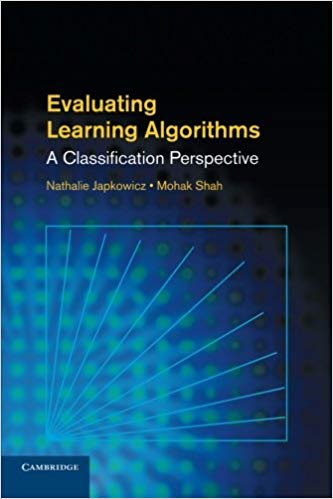

-   This
    [book](https://www.cambridge.org/core/books/evaluating-learning-algorithms/3CB22D16AB609D1770C24CA2CB5A11BF),
    4.6 stars rating on Amazon, delves into the evaluation process,
    particularly focusing on classification algorithms (Japkowicz and
    Shah 2011).

-   [Nathalie
    Japkowicz](https://www.american.edu/cas/faculty/japkowic.cfm)
    previously served as a professor at the University of Ottawa and is
    currently affiliated with American University in Washington.

-   [Mohak Shah](http://www.mohakshah.com), who earned his PhD from the
    University of Ottawa, has held numerous industry roles, including
    Vice President of AI and Machine Learning at LG Electronics.

## Further reading

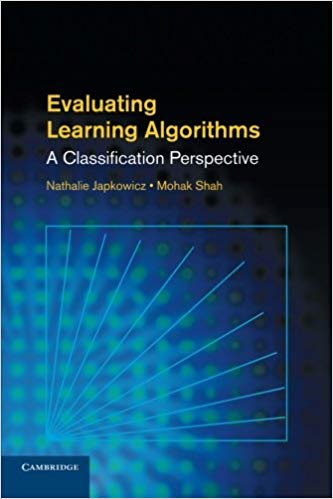

Japkowicz and Shah (2011)

This book, which examines various aspects of the evaluation process with
an emphasis on classification algorithms, has excellent ratings on
Amazon!

[Nathalie Japkowicz](https://www.american.edu/cas/faculty/japkowic.cfm)
was formely a professor that the University of Ottawa. She now works at
the American University in Washington.

[Mohak Shah](http://www.mohakshah.com) completed his PhD at the
University of Ottawa. He has held several positions in the industry,
including AI and Machine Learning Vice President for LG Electronics.

## Next lecture

-   We will examine cross-validation and hyperparameter tuning.

## References

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3rd ed. O’Reilly Media, Inc.

Japkowicz, Nathalie, and Mohak Shah. 2011. *Evaluating Learning
Algorithms: A Classification Perspective*. Cambridge: Cambridge
University Press.

Knowler, William C., David J. Pettitt, Peter J. Savage, and Peter H.
Bennett. 1981. “Diabetes Incidence in Pima Indians: Contributions of
Obesity and Parental Diabetes.” *American Journal of Epidemiology* 113
2: 144–56. <https://api.semanticscholar.org/CorpusID:25209675>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa